<a href="https://colab.research.google.com/github/diogorodrigues2002/Data-Mining-Project/blob/main/codigo_projecto_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data and libraries

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Importing the dataframe

In [2]:
df=pd.read_csv('/content/DM2425_ABCDEats_DATASET (1).csv',delimiter=',')
#df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

# Helper functions

In [3]:
def detect_outliers_in_column(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# General look at the data

In [4]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [6]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [7]:
df.describe(include=['object'])

,customer_id,customer_region,last_promo,payment_method
count,31888,31888,31888,31888
unique,31875,9,4,3
top,742ca068fc,8670,-,CARD
freq,2,9761,16748,20161


# Lets check for duplicates

Let`s see if there are any duplicates rows in the dataset

In [8]:
print('There are '+str(df.duplicated().sum()) +' duplicated rows in the dataset')

There are 13 duplicated rows in the dataset


We will remove this duplicated rows to avoid errors caused by repeated indices

In [9]:
df=df.drop_duplicates()
df.duplicated().sum()

0

# Let`s check for missing values

Visualize the percentage of missing values for each column in the DataFrame

In [10]:
(df.isna().mean()*100).sort_values(ascending=False)

,0
HR_0,3.651765
customer_age,2.280784
first_order,0.332549
customer_id,0.000000
HR_10,0.000000
DOW_6,0.000000
HR_1,0.000000
HR_2,0.000000
HR_3,0.000000
HR_4,0.000000


# Analising original variables

In this section of the analysis, we will examine each variable to understand their distributions and identify any potential issues. Our goal is to derive valuable insights from this exploration

## Let`s analise the customer_id variable

The customer_id variable is a unique identifier for each customer

We will set customer_id as the index of your DataFrame, it is beneficial because it uniquely identifies each customer, making it easier to locate, access, and manage individual customer data efficiently. To do this we need to check if there is repeated ids.

Let's examine the key statistics for this variable:

In [11]:
df['customer_id'].describe()

,customer_id
count,31875
unique,31875
top,1b8f824d5e
freq,1


There are no repeated id`s because the count is equal to unique

In [12]:
print('The customer_id variable has ' + str(df['customer_id'].isna().mean()*100) + '% of missing values')

The customer_id variable has 0.0% of missing values


There is no dublicated ids so we will set this variable as the index

In [13]:
df.set_index('customer_id', inplace=True)

## Let`s analise the customer_age variable

The customer_age variable represents the age of the costumer

Let's examine the key statistics for this variable:

In [14]:
df['customer_age'].describe()

,customer_age
count,31148.000000
mean,27.507545
std,7.161828
min,15.000000
25%,23.000000
50%,26.000000
75%,31.000000
max,80.000000


In [15]:
print('The customer_age variable has ' + str(df['customer_age'].isna().mean()*100) + '% of missing values')

The customer_age variable has 2.28078431372549% of missing values


Since our clustering model cannot accommodate missing values, we will address this issue during the preprocessing stage.

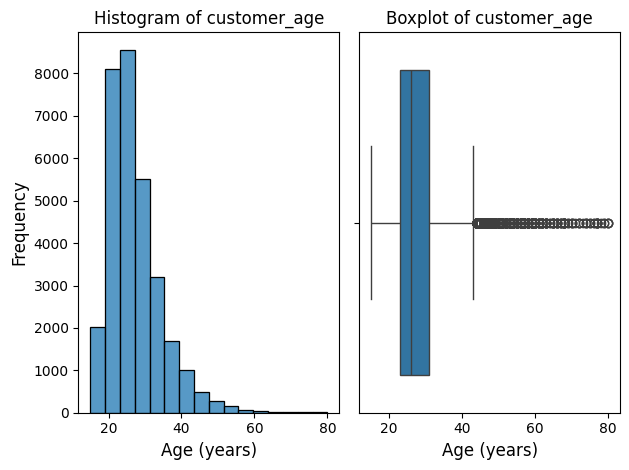

In [16]:
# First subplot: Histogram of customer_age
plt.subplot(1, 2, 1)
sns.histplot(df['customer_age'], bins=16, kde=False)
plt.title('Histogram of customer_age')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Second subplot: Boxplot of customer_age
plt.subplot(1, 2, 2)
sns.boxplot(x=df['customer_age'])
plt.title('Boxplot of customer_age')
plt.xlabel('Age (years)', fontsize=12)

# Layout adjustment and display
plt.tight_layout()
plt.show()

By examining this histogram and boxplot, we can see that the age distribution is asymmetric. This is likely due to outliers, which we can visualize in the boxplot.

We will obtain this outliers represented in the boxplot using the inter quartis technique

In [17]:
detect_outliers_in_column(df,'customer_age')['customer_age'].sort_values()

,customer_age
customer_id,
f4afb20885,44.0
f48b178ab2,44.0
6dfdf625fa,44.0
63d635d8df,44.0
ee3ff30383,44.0
...,...
a956a51629,79.0
1c15824d4f,79.0
65ab5e9447,80.0


For improved visualization of our data, we will temporarily exclude the outliers

In [18]:
df_age=df.copy()
df_age=df_age[df_age['customer_age']<44]

Same visualisation as before but without the outliers

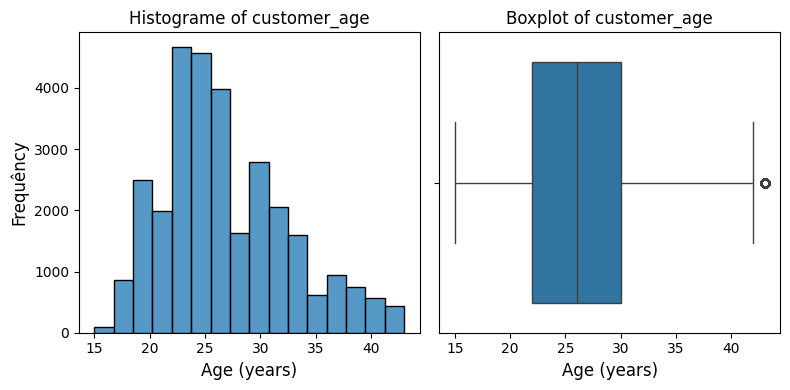

In [19]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_age['customer_age'], bins=16, kde=False)
plt.title('Histograme of customer_age')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequêncy', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x=df_age['customer_age'])
plt.title('Boxplot of customer_age')
plt.xlabel('Age (years)', fontsize=12)

plt.tight_layout()
plt.show()

**Observations**
  

* The variable shows a positive skew, with a concentration of lower values and a longer tail extending toward higher values.
*   A significant number of outliers skew toward older age groups. These are not errors but reflect older individuals choosing to use the delivery app.
*   Around 2.3% of values are missing, which is likely attributable to data entry inconsistencies.









## Let`s analise the customer_region variable

The customer_region variable represents the Geographic region where the customer is located.

Let's examine the key statistics for this variable:

In [20]:
df['customer_region'].describe()

,customer_region
count,31875
unique,9
top,8670
freq,9761


In [21]:
print('The customer_region variable has ' + str(df['customer_region'].isna().mean()*100) + '% of missing values')

The customer_region variable has 0.0% of missing values


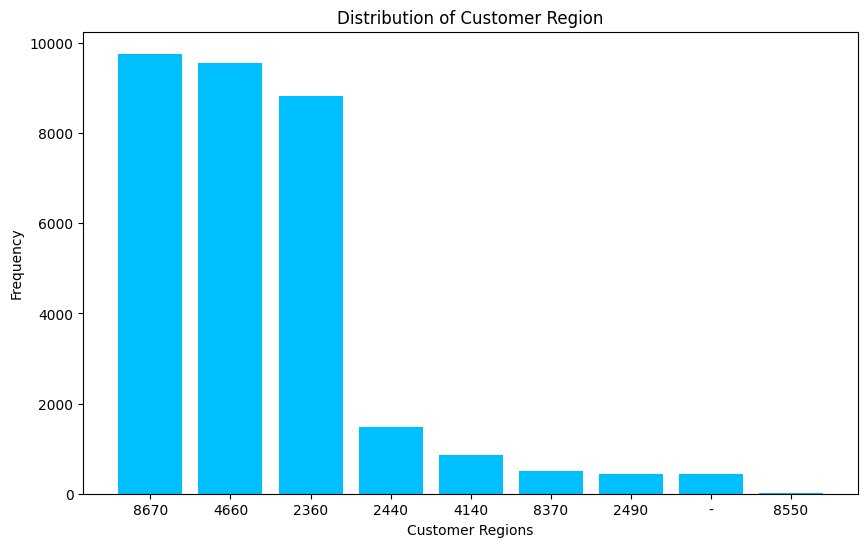

In [22]:
customer_region_counts = df['customer_region'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(customer_region_counts.index, customer_region_counts.values, color='deepskyblue')
plt.xlabel('Customer Regions')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Region')
plt.xticks(rotation=0)
plt.show()

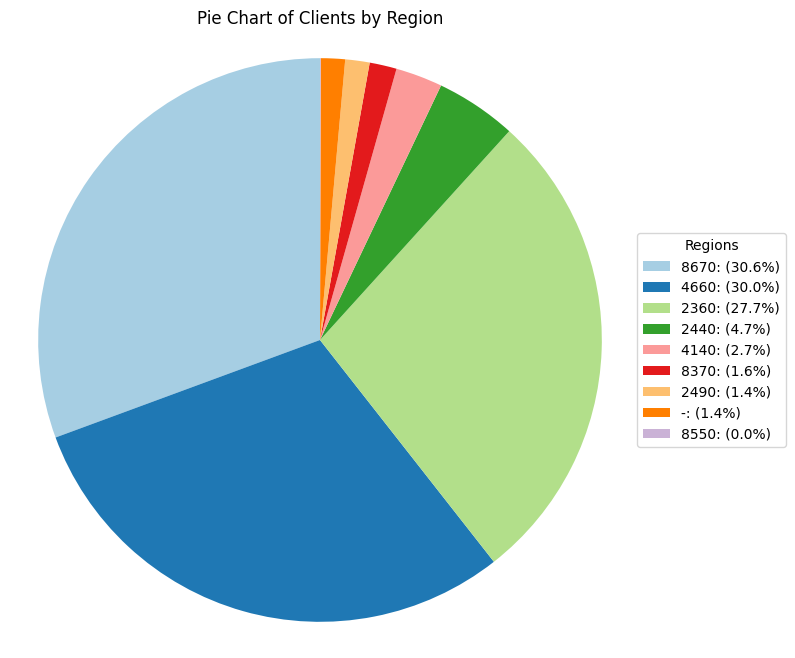

In [23]:
region_counts = df['customer_region'].value_counts(dropna=True)
colors = plt.cm.Paired(range(len(region_counts)))
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(region_counts, startangle=90, colors=colors)
legend_labels = [f'{region}: ({100 * count / sum(region_counts):.1f}%)' for region, count in zip(region_counts.index, region_counts)]
plt.legend(wedges, legend_labels, title="Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Pie Chart of Clients by Region")
plt.axis('equal')
plt.show()

**Observations**
  

* This variable has a category of "-" wich means unknown, we should decide if we keep this value or we change it in the next stage
*  No missing values
*   The regions with more clients are 8670, 4660, 2360

## Let`s analise the vendor_count variable

The vendor_count variable represents the number of unique vendors the customer has ordered from.

Let's examine the key statistics for this variable:

In [24]:
df['vendor_count'].describe()

,vendor_count
count,31875.000000
mean,3.102714
std,2.771753
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,41.000000


In [25]:
print('The vendor_count variable has ' + str(df['vendor_count'].isna().mean()*100) + '% of missing values')

The vendor_count variable has 0.0% of missing values


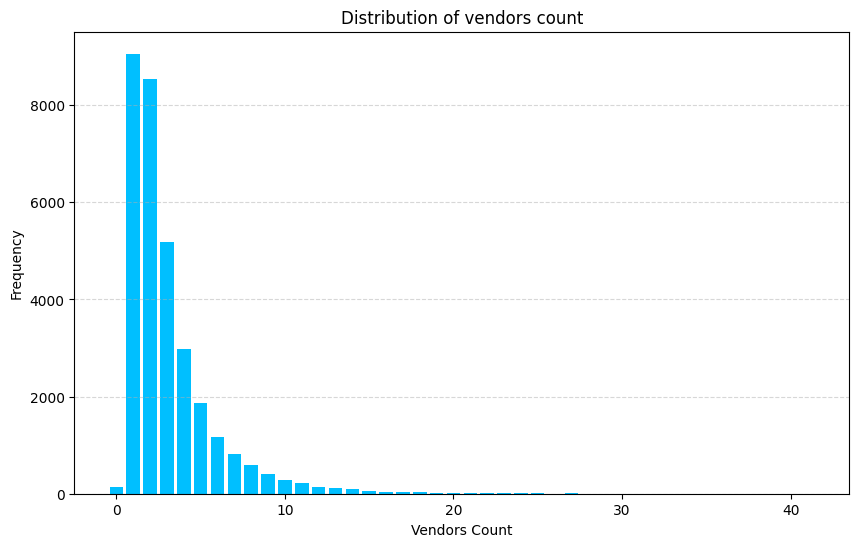

In [26]:
vendor_counts = df['vendor_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(vendor_counts.index, vendor_counts.values, color='deepskyblue')
plt.xlabel('Vendors Count')
plt.ylabel('Frequency')
plt.title('Distribution of vendors count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()

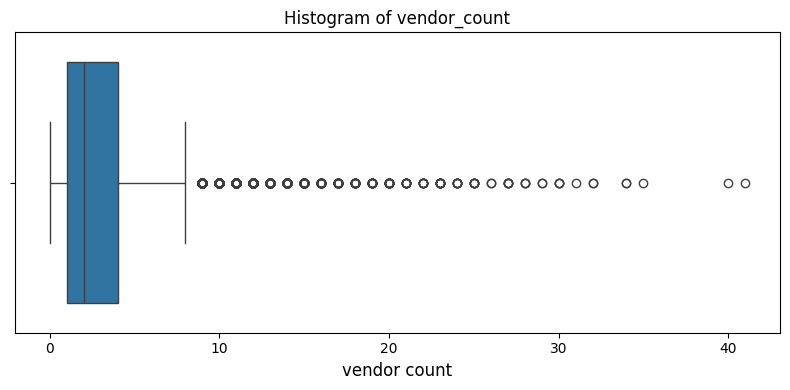

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['vendor_count'])
plt.title('Histogram of vendor_count')
plt.xlabel('vendor count', fontsize=12)
plt.tight_layout()
plt.show()

Examining the boxplot reveals an asymmetric vendor_count distribution, likely influenced by outliers, as shown in the boxplot. These outliers are unlikely to be data errors; they probably represent clients who simply decided to make more purchases.

We will obtain this outliers reprsented in the boxplot using the inter quartis technique

In [28]:
detect_outliers_in_column(df,'vendor_count')['vendor_count'].sort_values()

,vendor_count
customer_id,
47cd9589d2,9
7cc156c53d,9
e2b48611a0,9
a5e5a6cf7c,9
057dc4e4a7,9
...,...
9870fd931f,34
0ff44f1053,34
4b4f32ffc1,35


To get better visualisations, we will exclude the outliers for now:

In [29]:
df_vendor_count=df.copy()
df_vendor_count=df_vendor_count[df_vendor_count['vendor_count']<9]

In [30]:
df_vendor_count['vendor_count'].describe()

,vendor_count
count,30352.000000
mean,2.650336
std,1.733430
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,8.000000


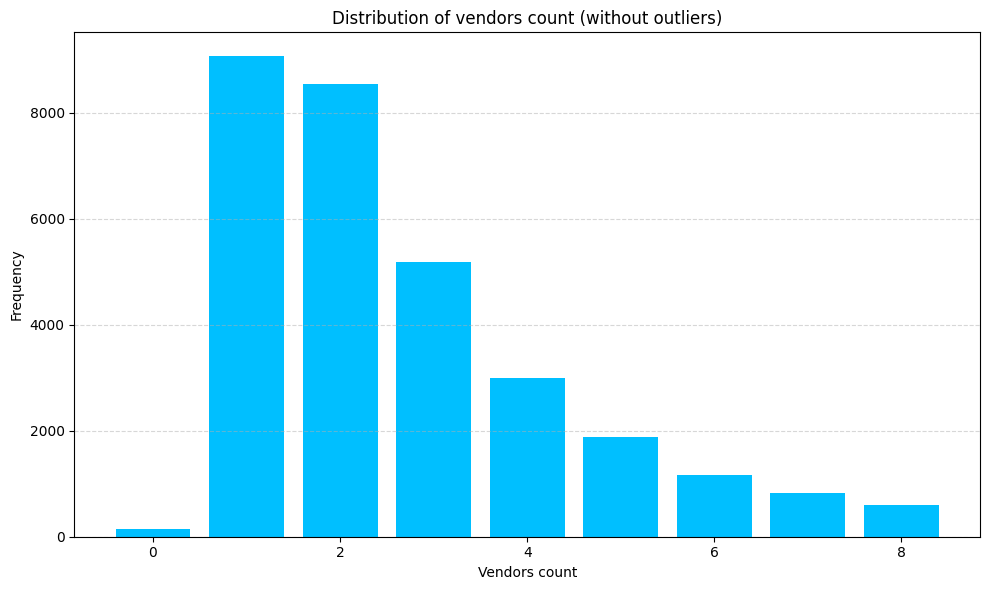

In [31]:
vendor_counts = df_vendor_count['vendor_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(vendor_counts.index, vendor_counts.values, color='deepskyblue')
plt.xlabel('Vendors count')
plt.ylabel('Frequency')
plt.title('Distribution of vendors count (without outliers)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Observations**
  

* The variable shows a positive skew, with a concentration of lower values and a longer tail extending toward higher values.
*  A significant number of outliers skew toward higher counts. These are not errors but refer to costumer that made a higher number of orders
*   No missing values

## Let`s analise the product_count variable

The product_count variable represents the total number of products the customer has ordered.


Let's examine the key statistics for this variable:

In [32]:
df['product_count'].describe()

,product_count
count,31875.000000
mean,5.668424
std,6.957933
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,269.000000


In [33]:
print('The product_count variable has ' + str(df['product_count'].isna().mean()*100) + '% of missing values')

The product_count variable has 0.0% of missing values


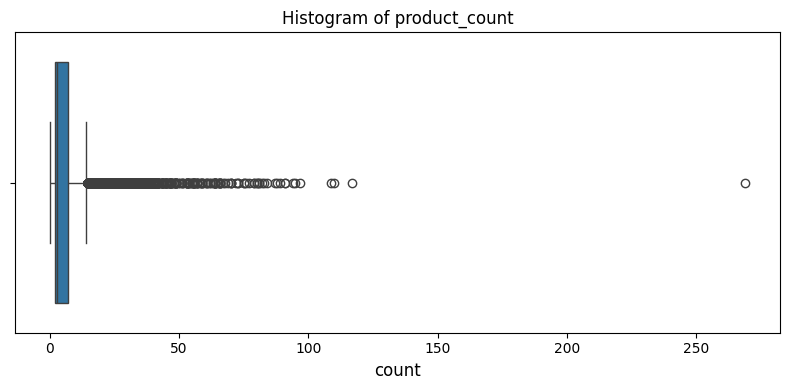

In [34]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['product_count'])
plt.title('Histogram of product_count')
plt.xlabel('count', fontsize=12)
plt.tight_layout()
plt.show()

Analyzing the boxplot, we observe an outlier that stands far from the other values, representing an extreme point that could negatively impact our analysis and visualization. To mitigate this, we will adjust it to a more reasonable high value.

In [35]:
df['product_count'].max()

269

In [36]:
print(df[df['product_count']==269].index)

Index(['92ced2dcb9'], dtype='object', name='customer_id')


In [37]:
df.loc['92ced2dcb9','product_count']=100

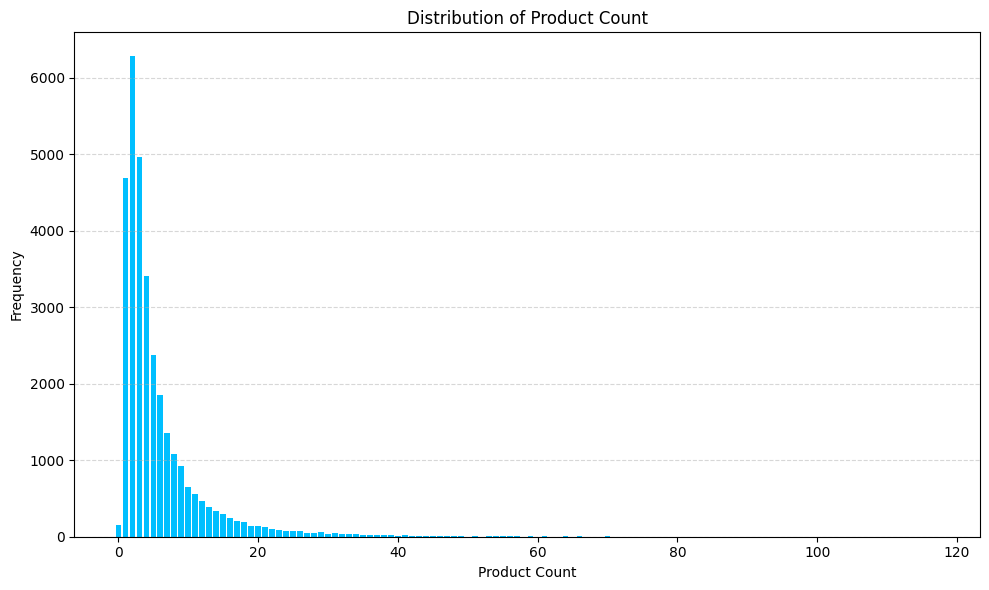

In [38]:
product_counts = df['product_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(product_counts.index, product_counts.values, color='deepskyblue')
plt.xlabel('Product Count')
plt.ylabel('Frequency')
plt.title('Distribution of Product Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

In these variable, there is still outliers that make the visualisation harder. These outliers are unlikely to be data errors; they probably represent clients who simply decided to buy more products.

We will obtain this outliers using the inter quartis technique

In [39]:
detect_outliers_in_column(df,'product_count')['product_count'].sort_values()

,product_count
customer_id,
81edb5d108,15
51c3de7464,15
a64d20b035,15
610bf919e0,15
52828f3ebf,15
...,...
9870fd931f,97
92ced2dcb9,100
d798652ec0,109


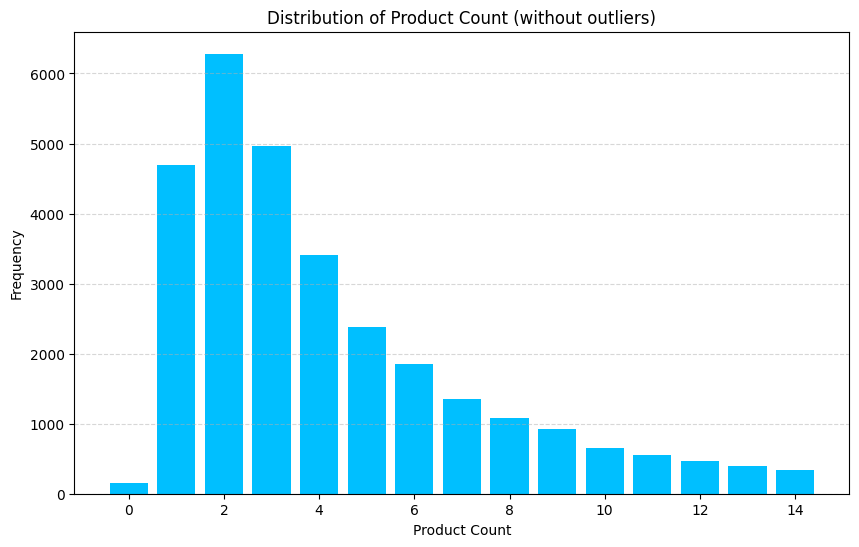

In [40]:
df_product_count=df.copy()
df_product_count=df_product_count[df_product_count['product_count']<15]
product_counts = df_product_count['product_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(product_counts.index, product_counts.values, color='deepskyblue')
plt.xlabel('Product Count')
plt.ylabel('Frequency')
plt.title('Distribution of Product Count (without outliers)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()

**Observations**

*   The variable shows a positive skew, with a concentration of lower values and a longer tail extending toward higher values.
*   A significant number of outliers skew toward higher counts. These are not errors but refer to costumer that made a higher number of product purchages in their orders
*   No missing values

## Let`s analise the first_order and last_order variables

The first_order variable represents the number of days from the start of the dataset when the customer first placed an order.

The last_order variable reprsents the number of days from the start of the dataset when the customer most recently placed an order.


Let's examine the key statistics of this variables:

In [41]:
df['first_order'].describe()

,first_order
count,31769.000000
mean,28.469924
std,24.104626
min,0.000000
25%,7.000000
50%,22.000000
75%,45.000000
max,90.000000


In [42]:
df['last_order'].describe()

,last_order
count,31875.000000
mean,63.672376
std,23.227992
min,0.000000
25%,49.000000
50%,70.000000
75%,83.000000
max,90.000000


In [43]:
print('The first_order variable has ' + str(df['first_order'].isna().mean()*100) + '% of missing values')
print('The last_order variable has ' + str(df['last_order'].isna().mean()*100) + '% of missing values')

The first_order variable has 0.3325490196078431% of missing values
The last_order variable has 0.0% of missing values


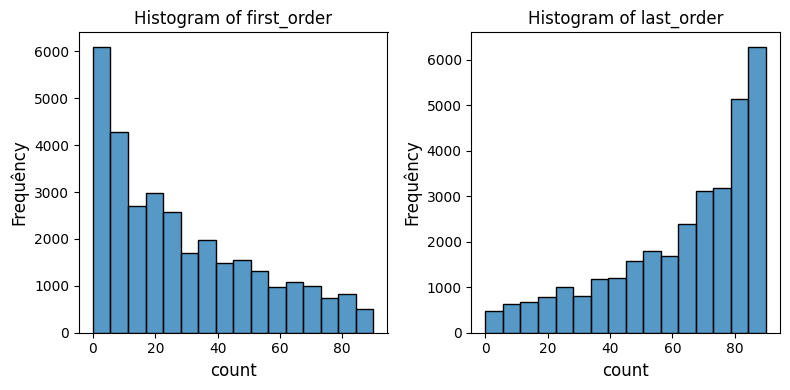

In [44]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['first_order'], bins=16, kde=False)
plt.title('Histogram of first_order')
plt.xlabel('count', fontsize=12)
plt.ylabel('Frequêncy', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(df['last_order'], bins=16, kde=False)
plt.title('Histogram of last_order')
plt.xlabel('count', fontsize=12)
plt.ylabel('Frequêncy', fontsize=12)

plt.tight_layout()
plt.show()

**Observations**

*   Missing values in the first_order variable, will be taken care in prepossessing stage
*   In the first order histogram, the high frequency of values near the beginning (close to 0 days) suggests that a large number of customers placed their first order relatively early in the timeline of the dataset. As the number of days increases, fewer customers are making their first purchase. This pattern could imply that many customers were acquired or joined around the beginning of the dataset period, with fewer new customers joining as time went on.
*   In the last order histogram, the majority of customers have recent activity (high values, near the dataset's end). This distribution suggests that a substantial portion of customers remained active or re-engaged until the end of the dataset period. It could also indicate strong retention or that the business successfully reactivates customers over time.
*   The contrasting shapes of first_order and last_order might also indicate that, while new customer acquisition slowed down over time, existing customers were retained effectively, leading to a stable or even increasing customer activity level toward the end.




## Let`s analise the last_promo variable

The last_promo variable represents the category of the promotion or discount most recently used by the customer.


Let's examine the key statistics of this variables:

In [45]:
df['last_promo'].describe()

,last_promo
count,31875
unique,4
top,-
freq,16744


In [46]:
print('The last_promo variable has ' + str(df['last_promo'].isna().mean()*100) + '% of missing values')

The last_promo variable has 0.0% of missing values


This categorical variable has 4 values. Wich are:
- "-": Our interpretation, given the limited information about how this data was collected, suggests that this symbol indicates the client did not utilize any promotions.
- "DELIVERY" - the client used the delivery promotion
- "DISCOUNT" - the client used the discount promotion
- "FREEBIE" - the client used the freebie promotion

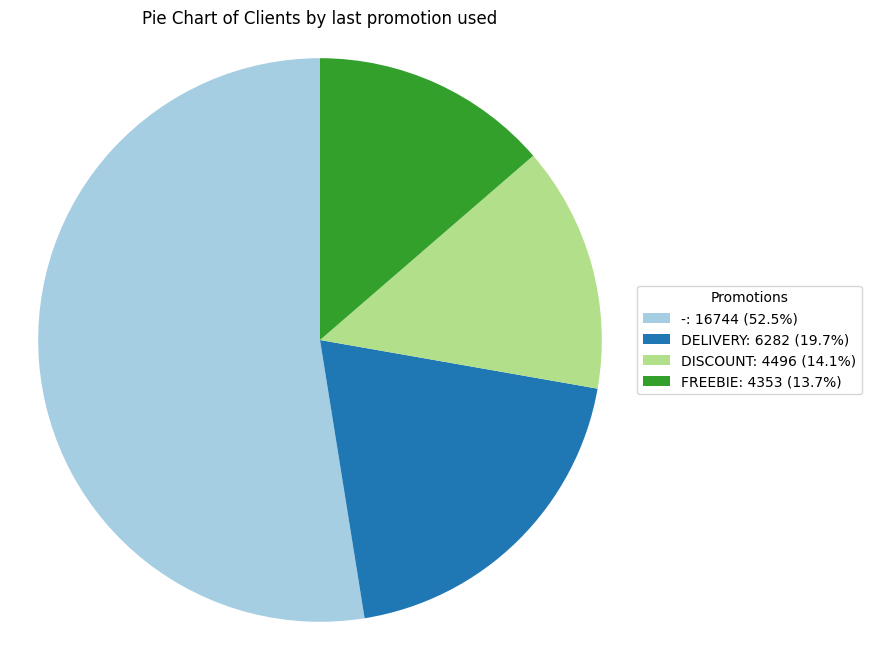

In [47]:
region_counts = df['last_promo'].value_counts(dropna=True)
colors = plt.cm.Paired(range(len(region_counts)))
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(region_counts, startangle=90, colors=colors)
legend_labels = [f'{region}: {count} ({100 * count / sum(region_counts):.1f}%)' for region, count in zip(region_counts.index, region_counts)]
plt.legend(wedges, legend_labels, title="Promotions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Pie Chart of Clients by last promotion used")
plt.axis('equal')
plt.show()

**Observations**

*   Most of the costumers didn`t used promotion codes
*   No missing values

## Let`s analise the payment_method variable

Let's examine the key statistics of this variables:

In [48]:
df['payment_method'].describe()

,payment_method
count,31875
unique,3
top,CARD
freq,20153


In [49]:
print('The payment_method variable has ' + str(df['payment_method'].isna().mean()*100) + '% of missing values')

The payment_method variable has 0.0% of missing values


This categorical variable has 3 values. Wich are:
- "CASH": If the Client used cash as his payment method
- "CARD" - If the Client used card as his payment method
- "DIGI" - If the Client used DIGI as his payment method

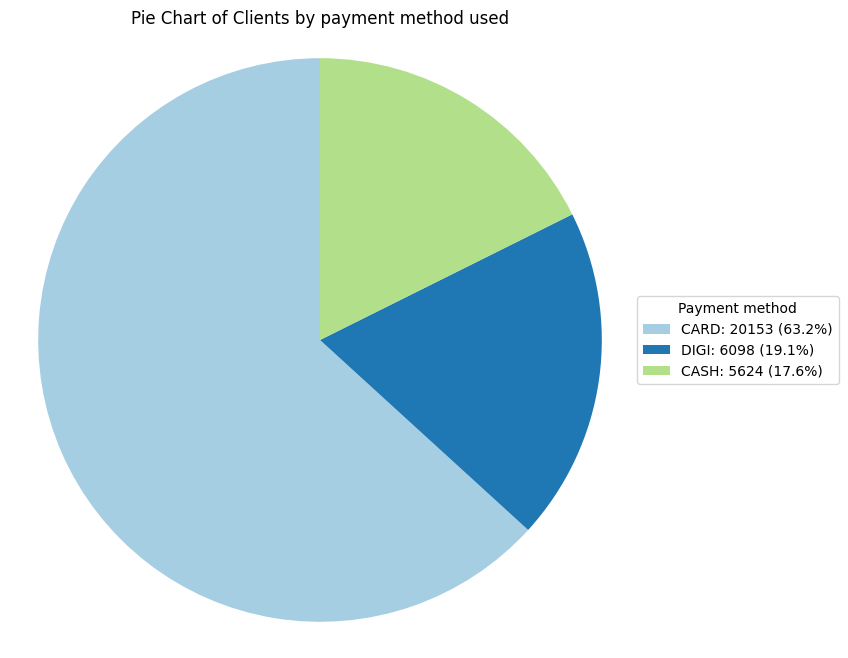

In [50]:
region_counts = df['payment_method'].value_counts(dropna=True)
colors = plt.cm.Paired(range(len(region_counts)))
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(region_counts, startangle=90, colors=colors)
legend_labels = [f'{region}: {count} ({100 * count / sum(region_counts):.1f}%)' for region, count in zip(region_counts.index, region_counts)]
plt.legend(wedges, legend_labels, title="Payment method", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Pie Chart of Clients by payment method used")
plt.axis('equal')
plt.show()

**Observations**

*   Most of the costumers use card as his payment method
*   No missing values

## Lets analise the CUIs variables

The CUI`s variable represents the amount in monetary units spent by the customer from the indicated type of cuisine

Let's examine the key statistics of this variables:

In [51]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
df[cuisine_columns].describe()

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
count,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000
mean,4.877205,9.955306,2.298224,0.801490,0.768409,1.431801,0.884719,0.950590,1.631818,3.234729,2.996031,0.711966,3.001137,3.910391,0.842040
std,11.647043,23.561492,8.475868,6.428422,3.657986,8.193374,5.260910,5.831747,7.444679,11.250094,10.182406,4.537359,9.770104,15.548367,4.433918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,280.210000,896.710000,229.220000,326.100000,219.660000,739.730000,230.070000,255.810000,309.070000,468.330000,706.140000,275.110000,366.080000,454.450000,136.380000


In [52]:
(df[cuisine_columns].isna().mean()*100).sort_values(ascending=False)

,0
CUI_American,0.0
CUI_Asian,0.0
CUI_Beverages,0.0
CUI_Cafe,0.0
CUI_Chicken Dishes,0.0
CUI_Chinese,0.0
CUI_Desserts,0.0
CUI_Healthy,0.0
CUI_Indian,0.0
CUI_Italian,0.0


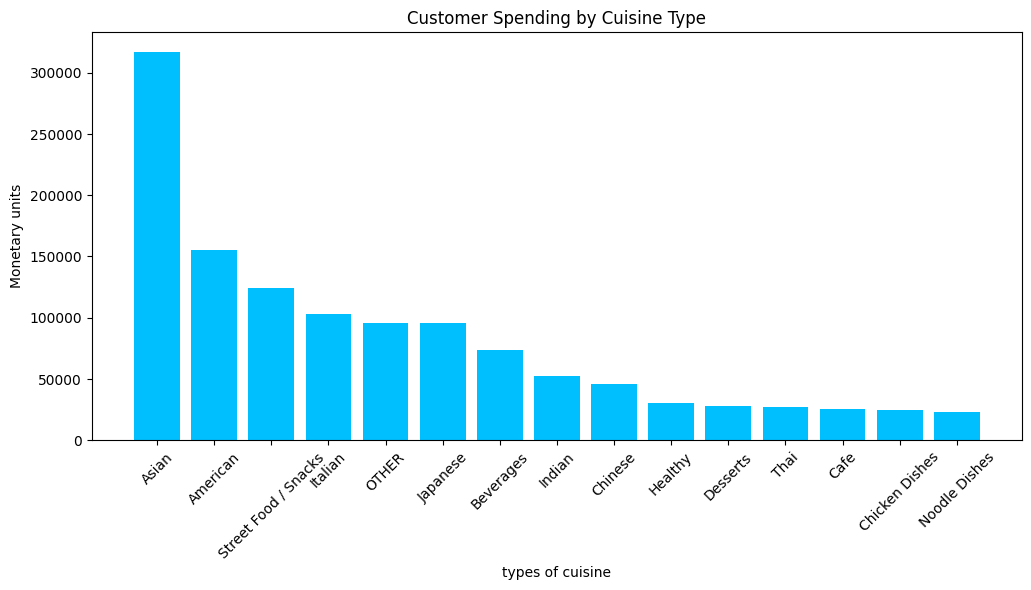

In [54]:
plt.figure(figsize=(12, 6))
sums_types = df[cuisine_columns].sum().sort_values(ascending=False)
sums_types.index = sums_types.index.str.replace('CUI_', '')
plt.bar(sums_types.index, sums_types.values, color='deepskyblue')
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=45)
plt.xlabel('types of cuisine')
plt.ylabel('Monetary units')
plt.title('Customer Spending by Cuisine Type')
plt.show()

**Observations**

*  The cuisine type with the most money spent is Asian cuisine being followed by the american and street food/snacks cuisines
*   No missing values

## Lets analise the DOW`s variables

The DOW`s variables represent the number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).

Let's examine the key statistics of this variables:

In [55]:
days_week_columns = [col for col in df.columns if col.startswith('DOW_')]
df[days_week_columns].describe()

,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
count,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000
mean,0.555922,0.567561,0.590933,0.619388,0.677867,0.652957,0.704408
std,1.013634,1.044190,1.045900,1.069558,1.088284,1.069802,1.167592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,16.000000,17.000000,15.000000,17.000000,16.000000,20.000000,20.000000


In [56]:
(df[days_week_columns].isna().mean()*100).sort_values(ascending=False)

,0
DOW_0,0.0
DOW_1,0.0
DOW_2,0.0
DOW_3,0.0
DOW_4,0.0
DOW_5,0.0
DOW_6,0.0


This variables represents the number of orders placed on each day of the week

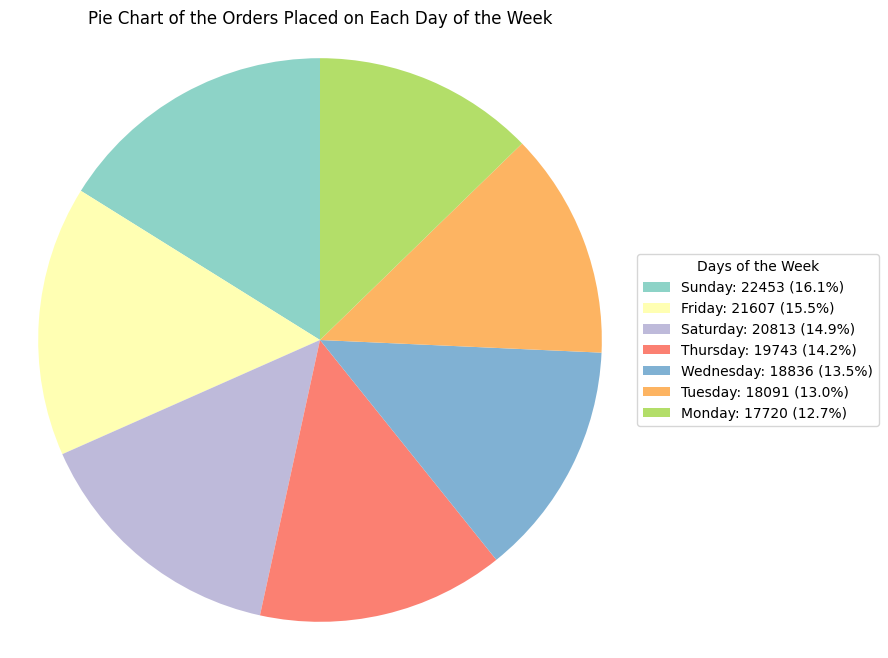

In [57]:
sums_types = df[days_week_columns].sum().sort_values(ascending=False)
colors = plt.cm.Set3(range(len(sums_types)))
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(sums_types, startangle=90, colors=colors)
dias_da_semana = ['Sunday', 'Friday', 'Saturday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
legend_labels = [f'{day}: {count} ({100 * count / sum(sums_types):.1f}%)' for day, count in zip(dias_da_semana, sums_types)]
plt.legend(wedges, legend_labels, title="Days of the Week", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Pie Chart of the Orders Placed on Each Day of the Week")
plt.axis('equal')
plt.show()

**Observations**

*  The data indicates an increase in orders toward the end of the week and into the weekend, peaking on Sunday. This could reflect customer behavior patterns where people are more likely to shop as they approach or during the weekend.
*   No missing values




## Lets analise the HR`s variables

The HR`s variables represent the number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).


Let's examine the key statistics of this variables:

In [58]:
hours_columns = [col for col in df.columns if col.startswith('HR_')]
df[hours_columns].describe()

,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,30711.0,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,...,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000
mean,0.0,0.053835,0.063153,0.118306,0.101710,0.081914,0.069616,0.076675,0.131859,0.233945,...,0.215686,0.277114,0.356580,0.391059,0.337098,0.245678,0.142871,0.071184,0.048282,0.045176
std,0.0,0.317031,0.351490,0.497117,0.437549,0.358701,0.329307,0.377349,0.635603,0.725015,...,0.599098,0.738282,0.874598,0.943873,0.894106,0.795433,0.586641,0.348604,0.298324,0.282011
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,14.000000,12.000000,11.000000,14.000000,7.000000,8.000000,15.000000,52.000000,23.000000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [59]:
(df[hours_columns].isna().mean()*100).sort_values(ascending=False)

,0
HR_0,3.651765
HR_1,0.000000
HR_22,0.000000
HR_21,0.000000
HR_20,0.000000
HR_19,0.000000
HR_18,0.000000
HR_17,0.000000
HR_16,0.000000
HR_15,0.000000


The variable 'HR_0' contains a value of 0.0 in all rows, indicating either that there were no orders placed at midnight or that there was an error in collecting data for this variable. Additionally, there are 3.65% of missing values. Due to these two issues, we will exclude this variable from our analysis, as it lacks significance.

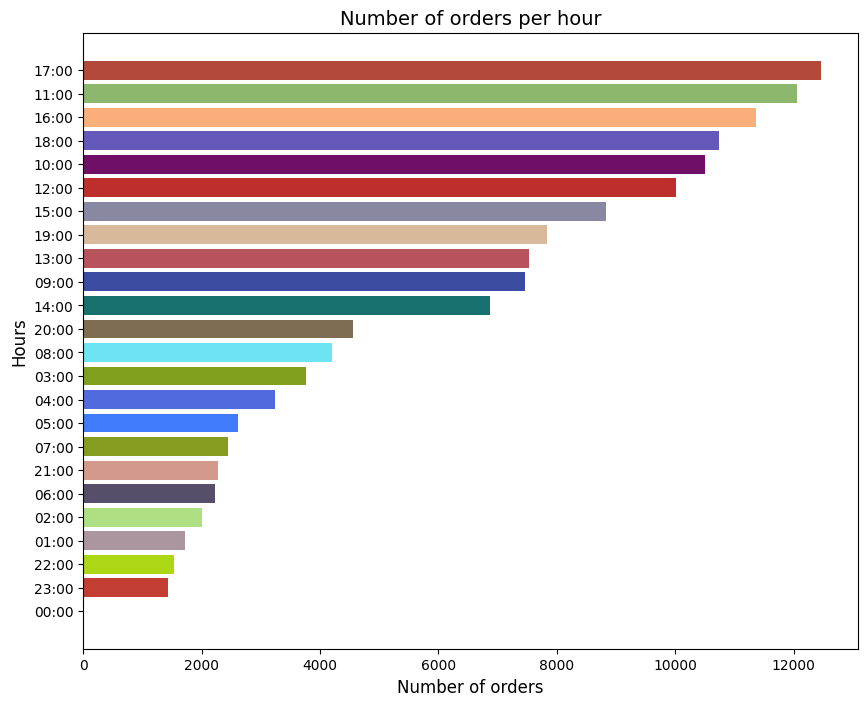

In [60]:
sums_types = df[hours_columns].sum().sort_values(ascending=False)
sums_types.index = sums_types.index.str.replace('HR_', '')
sums_types.index = sums_types.index.astype(int)  # Convert index to integers
sums_types.index = [f"{hour:02}:00" for hour in sums_types.index]
np.random.seed(123)
colors = np.random.rand(24, 3)

plt.figure(figsize=(10, 8))
plt.barh(sums_types.index, sums_types.values, color=colors)
plt.xlabel('Number of orders', fontsize=12)
plt.ylabel('Hours', fontsize=12)
plt.title('Number of orders per hour', fontsize=14)
plt.gca().invert_yaxis()

plt.show()


The hours 17 (5 PM) and 11 (11 AM) are the most popular times for placing orders, these peak hours likely represent meal times, where 11 AM may capture late morning orders for the lunch and 5 PM captures early dinner or post-work orders.

Early morning hours, such as 2 AM and 6 AM, and very late night hours, such as 23 (11 PM), have the lowest order volumes cause people don`t usually order food at this times.

**Observations**

*  This distribution suggests that most orders occur during typical meal times, especially late morning to early evening, with a clear spike around lunchtime and dinner time.
*   There are no orders recorded for HR_0 (midnight), which could indicate that the service is closed at this time or that customer activity is extremely low. We will probably drop this collumn in the preprossesing stage.

## Let`s analise is_chain variable

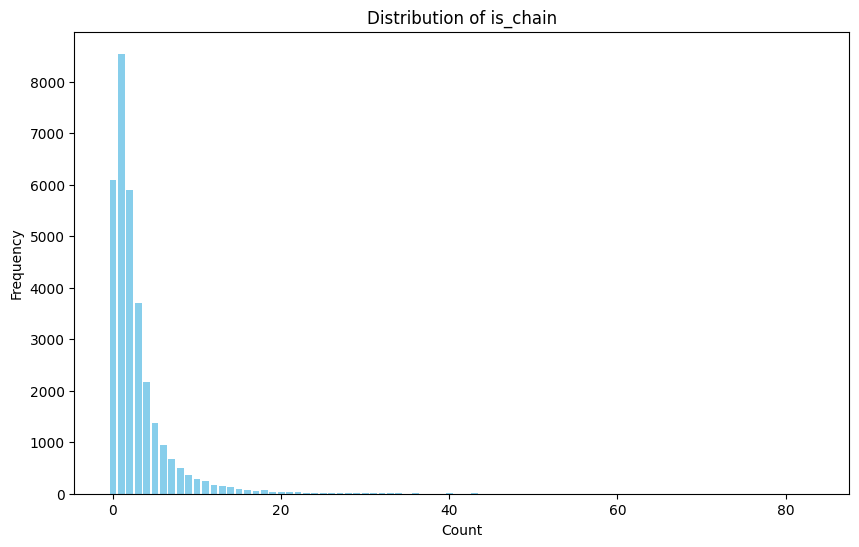

In [61]:
vendor_counts = df['is_chain'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(vendor_counts.index, vendor_counts.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of is_chain')
plt.xticks(rotation=0)
plt.show()

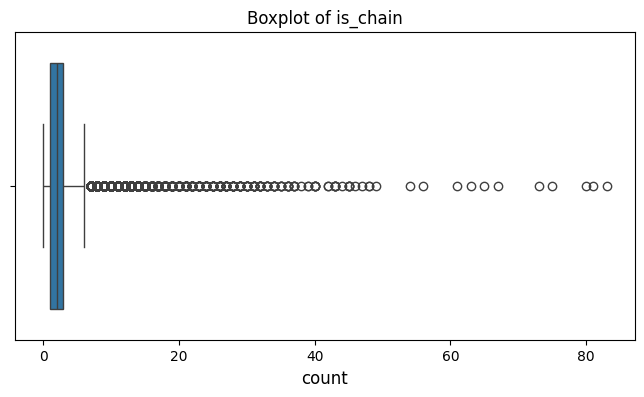

In [62]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['is_chain'])
plt.title('Boxplot of is_chain')
plt.xlabel('count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Examining the boxplot reveals an asymmetric is_chain distribution, likely influenced by outliers, as shown in the boxplot. These outliers are unlikely to be data errors; they probably represent clients who simply decided to make more orders.

We will obtain this outliers reprsented in the boxplot using the inter quartis technique

In [63]:
detect_outliers_in_column(df,'is_chain')['is_chain'].sort_values()

,is_chain
customer_id,
37c312f839,7
50c0ed4fc1,7
a55c9a9975,7
6c21533c45,7
eef1b04279,7
...,...
89b7866691,73
e1491fb8f7,75
4b5be62a93,80


To get better visualisations, we will exclude the outliers for now:

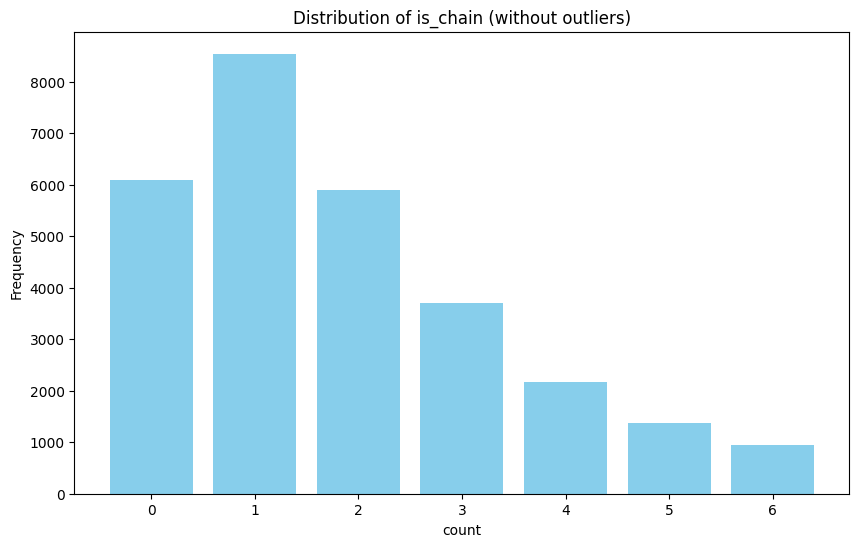

In [64]:
df_is_chain=df.copy()
df_is_chain=df_is_chain[df_is_chain['is_chain']<7]
is_chain_counts = df_is_chain['is_chain'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(is_chain_counts.index, is_chain_counts.values, color='skyblue')
plt.xlabel('count')
plt.ylabel('Frequency')
plt.title('Distribution of is_chain (without outliers)')
plt.xticks(rotation=0)
plt.show()

# Let's check for inconsistencies

In [65]:
df_inc=df.copy()

One important aspect to check in our dataframe is the presence of inconsistencies between variables, as these can lead to misleading information and, ultimately, cause our clustering model to produce inaccurate groupings

## Check if the sum of the number of orders placed on each day of the week is equal of the number of orders placed on each hour of the day

We will ignore HR_0

In [66]:
df_inc['sum_HR']=df_inc['HR_1']+df_inc['HR_2']+df_inc['HR_3']+df_inc['HR_4']+df_inc['HR_5']+df_inc['HR_6']+df_inc['HR_7']+df_inc['HR_8']+df_inc['HR_9']+df_inc['HR_10']+df_inc['HR_11']+df_inc['HR_12']+df_inc['HR_13']+df_inc['HR_14']+df_inc['HR_15']+df_inc['HR_16']+df_inc['HR_17']+df_inc['HR_18']+df_inc['HR_19']+df_inc['HR_20']+df_inc['HR_21']+df_inc['HR_22']+df_inc['HR_23']
df_inc['sum_DOW']=df_inc['DOW_0']+df_inc['DOW_1']+df_inc['DOW_2']+df_inc['DOW_3']+df_inc['DOW_4']+df_inc['DOW_5']+df_inc['DOW_6']

df_inc['inc_0']=(df_inc['sum_HR']!=df_inc['sum_DOW'])
df_inc['inc_0'].value_counts()

,count
inc_0,
False,30711
True,1164


In [67]:
df_inc[df_inc['inc_0']==True][['sum_HR','sum_DOW']]

,sum_HR,sum_DOW
customer_id,,
ae38da6386,1,2
a21a839c77,3,4
9237d23413,3,4
8c6ffd7357,2,3
67c6c9f9c4,2,3
...,...,...
37b72b449d,0,1
ac382ddfd1,1,2
96f1fc25e3,1,2


Conclusion:

There are 1164 rows with different sums of orders in the hours and days of the week

In [68]:
df_inc=df_inc[df_inc['inc_0']==False]

## vendor_count equals to zero

In [69]:
df_inc['inc_1']=(df_inc['vendor_count']==0)
df_inc['inc_1'].value_counts()

<ipython-input-69-608f4288358c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inc['inc_1']=(df_inc['vendor_count']==0)


,count
inc_1,
False,30573
True,138


Conclusion:

There are 138 rows with vendor_count equals to zero

## product_count equals to zero

In [70]:
df_inc['inc_2']=(df_inc['product_count']==0)
df_inc['inc_2'].value_counts()

<ipython-input-70-f55e3123fa6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inc['inc_2']=(df_inc['product_count']==0)


,count
inc_2,
False,30555
True,156


In [71]:
df_inc[(df_inc['inc_2']==True) & (df_inc['inc_1']==True)]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_19,HR_20,HR_21,HR_22,HR_23,sum_HR,sum_DOW,inc_0,inc_1,inc_2
customer_id,,,,,,,,,,,,,,,,,,,,,
4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,0,0,0,False,True,True
c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,...,0,0,0,0,0,0,0,False,True,True
f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,0,0,0,False,True,True
c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,...,0,0,0,0,0,0,0,False,True,True
1b7c34738e,8670,24.0,0,0,0,3.0,3,-,CASH,0.0,...,0,0,0,0,0,0,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177ede2420,8670,30.0,0,0,1,86.0,86,-,DIGI,0.0,...,0,0,0,0,0,0,0,False,True,True
0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,...,0,0,0,0,0,0,0,False,True,True
0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,...,0,0,0,0,0,0,0,False,True,True


Conclusion:

There are 156 rows where the product_count is zero; of these, 138 also have a vendor_count of zero.

## Total number of orders equals to zero

In [72]:
df_inc['inc_3']=(df_inc['sum_HR']==0)
df_inc['inc_3'].value_counts()

<ipython-input-72-4d03369d0d07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inc['inc_3']=(df_inc['sum_HR']==0)


,count
inc_3,
False,30573
True,138


In [73]:
df_inc[(df_inc['inc_2']==True) & (df_inc['inc_1']==True) & (df_inc['inc_3']==True)]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_20,HR_21,HR_22,HR_23,sum_HR,sum_DOW,inc_0,inc_1,inc_2,inc_3
customer_id,,,,,,,,,,,,,,,,,,,,,
4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,0,0,False,True,True,True
c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,...,0,0,0,0,0,0,False,True,True,True
f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,0,0,False,True,True,True
c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,...,0,0,0,0,0,0,False,True,True,True
1b7c34738e,8670,24.0,0,0,0,3.0,3,-,CASH,0.0,...,0,0,0,0,0,0,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177ede2420,8670,30.0,0,0,1,86.0,86,-,DIGI,0.0,...,0,0,0,0,0,0,False,True,True,True
0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,...,0,0,0,0,0,0,False,True,True,True
0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,...,0,0,0,0,0,0,False,True,True,True


Conclusion:

There are 138 rows where the total number of orders is zero, and in each of these, both product_count and vendor_count are also zero.

## Money spent by the costumer is 0

In [74]:
df_inc['money_spent']=df_inc[cuisine_columns].sum(axis=1)
df_inc['inc_4']=(df_inc['money_spent']==0)
df_inc['inc_4'].value_counts()

<ipython-input-74-0c633b55ec2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inc['money_spent']=df_inc[cuisine_columns].sum(axis=1)
<ipython-input-74-0c633b55ec2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inc['inc_4']=(df_inc['money_spent']==0)


,count
inc_4,
False,30573
True,138


In [75]:
df_inc[(df_inc['inc_4']==True) & (df_inc['inc_3']==True) & (df_inc['inc_2']==True) & (df_inc['inc_1']==True)]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_22,HR_23,sum_HR,sum_DOW,inc_0,inc_1,inc_2,inc_3,money_spent,inc_4
customer_id,,,,,,,,,,,,,,,,,,,,,
4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,False,True,True,True,0.0,True
c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,...,0,0,0,0,False,True,True,True,0.0,True
f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,False,True,True,True,0.0,True
c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,...,0,0,0,0,False,True,True,True,0.0,True
1b7c34738e,8670,24.0,0,0,0,3.0,3,-,CASH,0.0,...,0,0,0,0,False,True,True,True,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177ede2420,8670,30.0,0,0,1,86.0,86,-,DIGI,0.0,...,0,0,0,0,False,True,True,True,0.0,True
0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,...,0,0,0,0,False,True,True,True,0.0,True
0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,...,0,0,0,0,False,True,True,True,0.0,True


Conclusion:

There are 138 rows where the money spent is zero, and in each of these, product_count, vendor_count and total number of orders are also zero.

In [76]:
df_inc=df_inc[df_inc['inc_2']==False]


## The total number of orders cannot be less than the vendor_count

In [77]:
df['inc_5']=df_inc['sum_HR']<df_inc['vendor_count']
df['inc_5'].value_counts()

,count
inc_5,
False,30555


## product count has to be greater than the total number of orders

In [78]:
df_inc['inc_6']=df_inc['product_count']<df_inc['sum_HR']
df_inc['inc_6'].value_counts()

<ipython-input-78-f26cbce9ced3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inc['inc_6']=df_inc['product_count']<df_inc['sum_HR']


,count
inc_6,
False,30555


## is_chain cannot be greater then the total of orders

In [79]:
df_inc['inc_7']=df_inc['is_chain']>df_inc['sum_HR']
df_inc['inc_7'].value_counts()

<ipython-input-79-6cbd6d909c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inc['inc_7']=df_inc['is_chain']>df_inc['sum_HR']


,count
inc_7,
False,30555


## last_order cannot be first then first_order

In [80]:
df_inc['inc_8']=df_inc['last_order']<df_inc['first_order']
df_inc['inc_8'].value_counts()

<ipython-input-80-dcfaaff2104e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inc['inc_8']=df_inc['last_order']<df_inc['first_order']


,count
inc_8,
False,30555


# Creation of new variables

## Creation of the variable costumer_time

Customer_time is a variable that represents the duration of each customer's interaction with the delivery service

In [81]:
df['costumer_time']=df['last_order']-df['first_order']

Let's examine the key statistics for this variable:

In [82]:
df['costumer_time'].describe()

,costumer_time
count,31769.000000
mean,35.414901
std,29.415668
min,0.000000
25%,3.000000
50%,34.000000
75%,62.000000
max,90.000000


In [83]:
print('The costumer_time variable has ' + str(df['costumer_time'].isna().mean()*100) + '% of missing values')

The costumer_time variable has 0.3325490196078431% of missing values


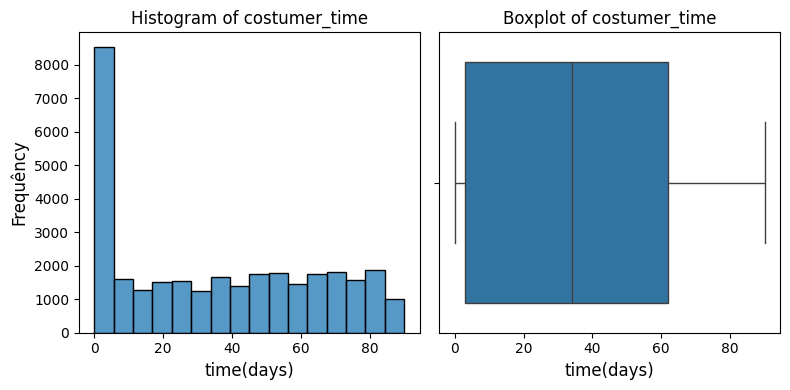

In [84]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['costumer_time'], bins=16, kde=False)
plt.title('Histogram of costumer_time')
plt.xlabel('time(days)', fontsize=12)
plt.ylabel('Frequêncy', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['costumer_time'])
plt.title('Boxplot of costumer_time')
plt.xlabel('time(days)', fontsize=12)

plt.tight_layout()
plt.show()

We can see in the histogram that there are many clients who have a customer_time of zero, indicating that they are not repeat clients.

To enhance visualization, we will omit them

Text(0, 0.5, 'Frequêncy')

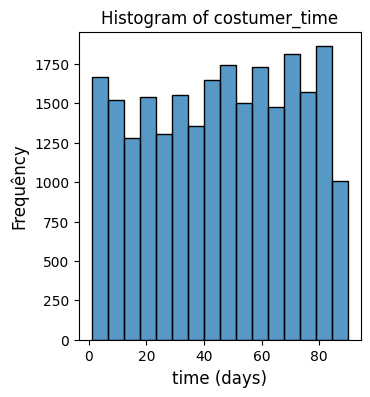

In [85]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[df['costumer_time']!=0]['costumer_time'], bins=16, kde=False)
plt.title('Histogram of costumer_time')
plt.xlabel('time (days)', fontsize=12)
plt.ylabel('Frequêncy', fontsize=12)

**Observations**

*  This variable has 0.33% of variables due to the first_order missing values
*  This variable has a high number of zero values, indicating a large proportion of one-time customers. It would be valuable to group repeat customers separately from non-repeat customers to tailor marketing strategies aimed at increasing customer loyalty to the service and encouraging repeat purchases.

## Creation of the variable order_hour_spread

The order_hour_spread metric quantifies the variability in order counts across different hours of the day for each customer represented in the DataFrame.

A low order_hour_spread indicates that orders are consistently placed on certain hours of the day, suggesting a regular purchasing pattern

A high order_hour_spread implies that orders are spread out more evenly across different hours, indicating a less predictable or more varied purchasing pattern

In [185]:
hour_columns = [f'HR_{i}' for i in range(1,24)]
def weighted_time_spread(row):
    hours = np.arange(1, 24)
    order_counts = row[hour_columns].values
    valid_hours = hours[:len(order_counts)]
    if np.sum(order_counts) == 0:
        return np.nan
    mean_hour = np.average(valid_hours, weights=order_counts)
    variance = np.average((valid_hours - mean_hour) ** 2, weights=order_counts)
    return np.sqrt(variance)
df['order_hour_spread'] = df.apply(weighted_time_spread, axis=1)
df['order_hour_spread'] = (df['order_hour_spread']+1)/df['order_count']

Let's examine the key statistics for this variable:

In [186]:
df['order_hour_spread'].describe()

,order_hour_spread
count,31640.000000
mean,0.931216
std,0.585717
min,0.032747
25%,0.500000
50%,0.923146
75%,1.000000
max,6.000000


In [187]:
print('The order_hour_spread variable has ' + str(df['order_hour_spread'].isna().mean()*100) + '% of missing values')

The order_hour_spread variable has 0.7372549019607844% of missing values


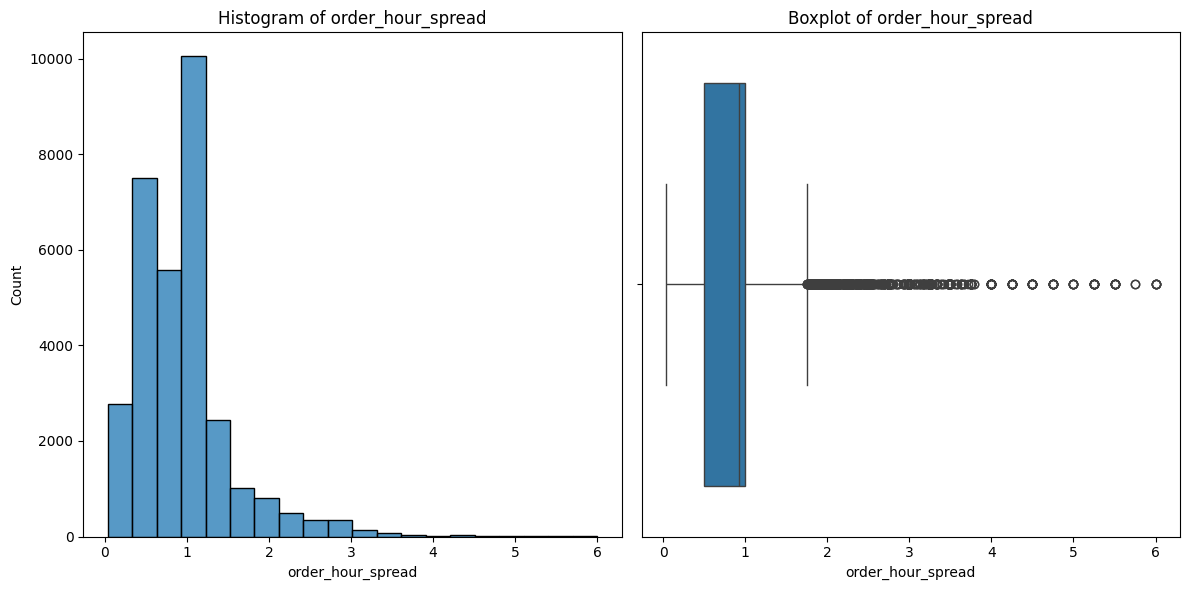

In [188]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['order_hour_spread'], bins=20, kde=False)
plt.title('Histogram of order_hour_spread')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['order_hour_spread'])
plt.title('Boxplot of order_hour_spread')

plt.tight_layout()
plt.show()

In [163]:
pd.set_option('display.max_columns', None)

In [197]:
df[hour_columns+['order_hour_spread','order_count']].sort_values(by='order_hour_spread',ascending=False).iloc[100:500]

,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_hour_spread,order_count
19835,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.75,2
21988,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.75,2
23623,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.75,2
12380,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.75,2
16945,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3.75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2.75,2
11518,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.75,2
19764,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.75,2
5171,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.75,2


**Observations**
*   The missing values of this variables are from rows with order_count equal to zero

*   This order_hour_spread variable has a significant number of zero values, primarily due to customers who placed only a few orders, which makes it easier for them to order at the same hour.

## Creation of the variable order_day_spread

The order_day_spread metric quantifies the variability in order counts across different days of the week for each customer or entity represented in the DataFrame.

A low order_day_spread indicates that orders are consistently placed on certain days of the week, suggesting a regular purchasing pattern

A high order_day_spread implies that orders are spread out more evenly across different days, indicating a less predictable or more varied purchasing pattern

In [198]:
day_columns = [f'DOW_{i}' for i in range(7)]
def weighted_time_spread(row):
    days = np.arange(7)
    order_counts = row[day_columns].values
    if np.sum(order_counts) == 0:
        return np.nan
    mean_hour = np.average(days, weights=order_counts)
    variance = np.average((days - mean_hour)**2, weights=order_counts)
    return np.sqrt(variance)
df['order_day_spread'] = df.apply(weighted_time_spread, axis=1)
df['order_day_spread'] = (df['order_day_spread']+1)/df['order_count']


Let's examine the key statistics for this variable:

In [199]:
df['order_day_spread'].describe()

,order_day_spread
count,31737.000000
mean,0.742449
std,0.365569
min,0.031787
25%,0.466506
50%,0.750000
75%,1.000000
max,2.000000


In [200]:
print('The order_day_spread variable has ' + str(df['order_day_spread'].isna().mean()*100) + '% of missing values')

The order_day_spread variable has 0.4329411764705882% of missing values


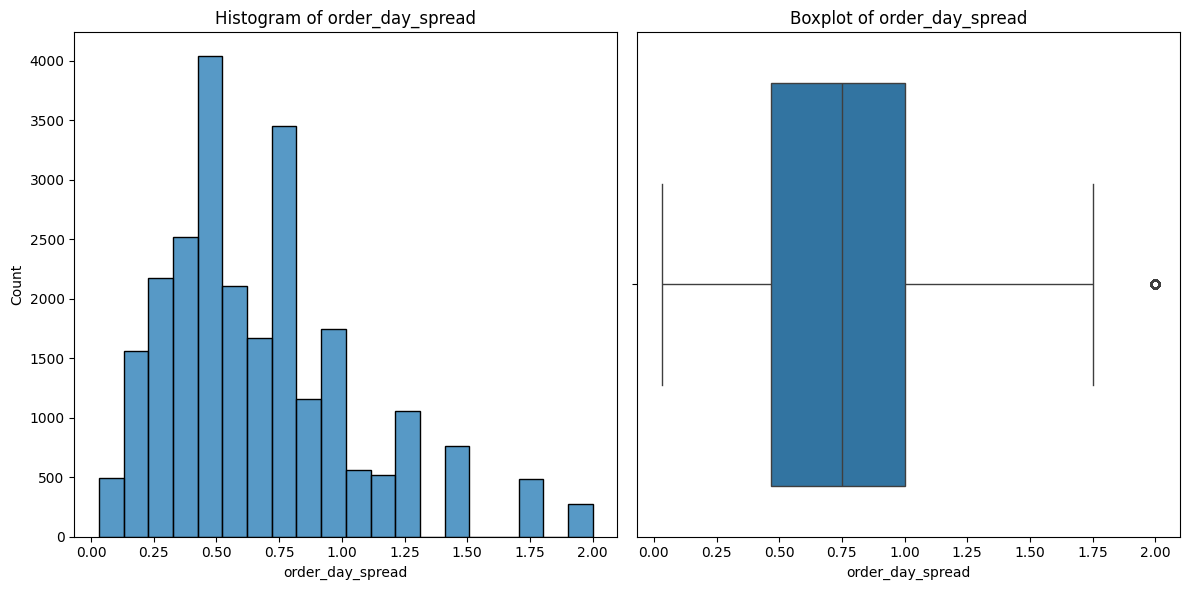

In [201]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['costumer_time']>0]['order_day_spread'], bins=20, kde=False)
plt.title('Histogram of order_day_spread')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['order_day_spread'])
plt.title('Boxplot of order_day_spread')
plt.tight_layout()
plt.show()

**Observations**
*   The missing values of this variable are from rows with order_count equal to zero

*   This variable has a significant number of zero values, primarily due to customers who placed only a few orders, which makes it easier for them to order at the same day of the week.

## Creation of the variable diversity_cuisine

diversity_cuisine is a variable that represents a measure of how many different types of cuisines a customer has ordered, where a value of 0 means the customer has not ordered any type of cuisine, and higher values indicate a broader range of types of cuisines.

In [95]:
cuisine_columns = [col for col in df.columns if col.startswith("CUI_")]
df['diversity_cuisine'] = (df[cuisine_columns] > 0).sum(axis=1)
df['diversity_cuisine'] = df['diversity_cuisine'].replace(0, np.nan)

Let's examine the key statistics for this variable:

In [96]:
df['diversity_cuisine'].describe()

,diversity_cuisine
count,31737.000000
mean,2.285156
std,1.480498
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,13.000000


In [97]:
print('The diversity_cuisine variable has ' + str(df['diversity_cuisine'].isna().mean()*100) + '% of missing values')

The diversity_cuisine variable has 0.4329411764705882% of missing values


In [98]:
df['diversity_cuisine'].describe()

,diversity_cuisine
count,31737.000000
mean,2.285156
std,1.480498
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,13.000000


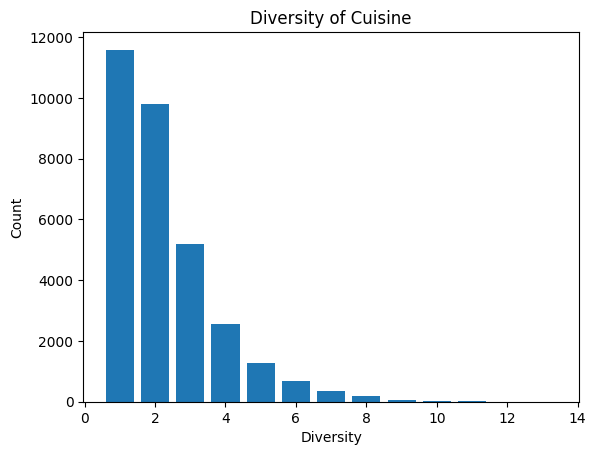

In [99]:
df_agrupado = df.groupby('diversity_cuisine').size().reset_index(name='count')
plt.bar(df_agrupado['diversity_cuisine'], df_agrupado['count'])
plt.xlabel('Diversity')
plt.ylabel('Count')
plt.title('Diversity of Cuisine')
plt.show()

**Observations**
*   The missing values of this variable are from rows with total money spent equal to zero

## Creation of the variable order_count

order_count represent the total number of orders of each costumer

In [100]:
df['order_count']=df['DOW_0']+df['DOW_1']+df['DOW_2']+df['DOW_3']+df['DOW_4']+df['DOW_5']+df['DOW_6']

Let's examine the key statistics for this variable:

In [101]:
df['order_count'].describe()

,order_count
count,31875.000000
mean,4.369035
std,5.084780
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,94.000000


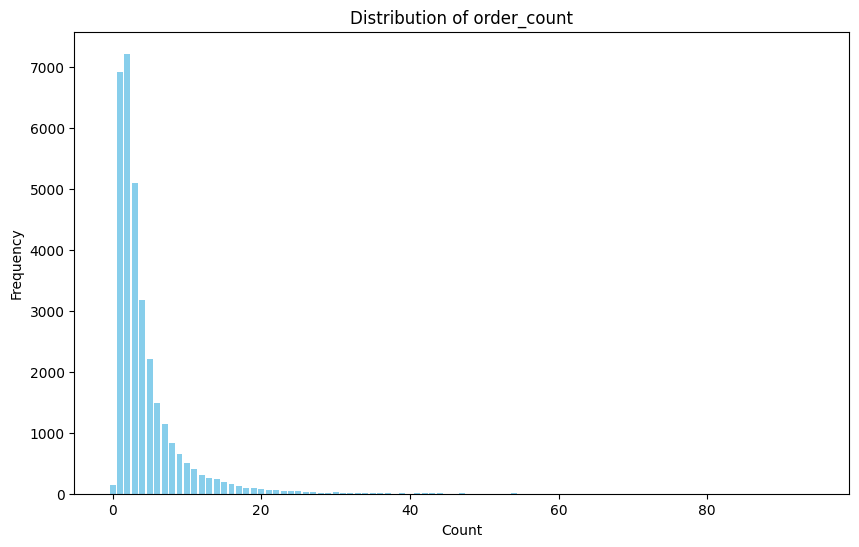

In [102]:
vendor_counts = df['order_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(vendor_counts.index, vendor_counts.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of order_count')
plt.xticks(rotation=0)
plt.show()

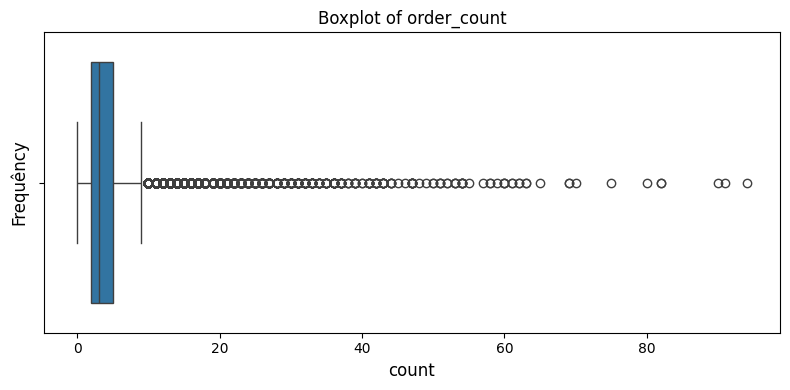

In [103]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['order_count'])
plt.title('Boxplot of order_count')
plt.xlabel('count', fontsize=12)
plt.ylabel('Frequêncy', fontsize=12)
plt.tight_layout()
plt.show()

Examining the histogram and boxplot reveals an asymmetric order_count distribution, likely influenced by outliers, as shown in the boxplot. These outliers are unlikely to be data errors; they probably represent clients who simply decided to make more orders.

We will obtain this outliers represented in the boxplot using the inter quartis technique

In [104]:
detect_outliers_in_column(df,'order_count')['order_count'].sort_values()

,order_count
customer_id,
de4cafca2f,10
47de1d7c7f,10
d68875653c,10
29715cace9,10
dbeaa5eb31,10
...,...
89b7866691,82
1846111110,82
910e70571d,90


To get better visualisations, we will exclude the outliers for now:

In [105]:
df_order_count=df.copy()
df_order_count=df_order_count[df_order_count['order_count']<10]

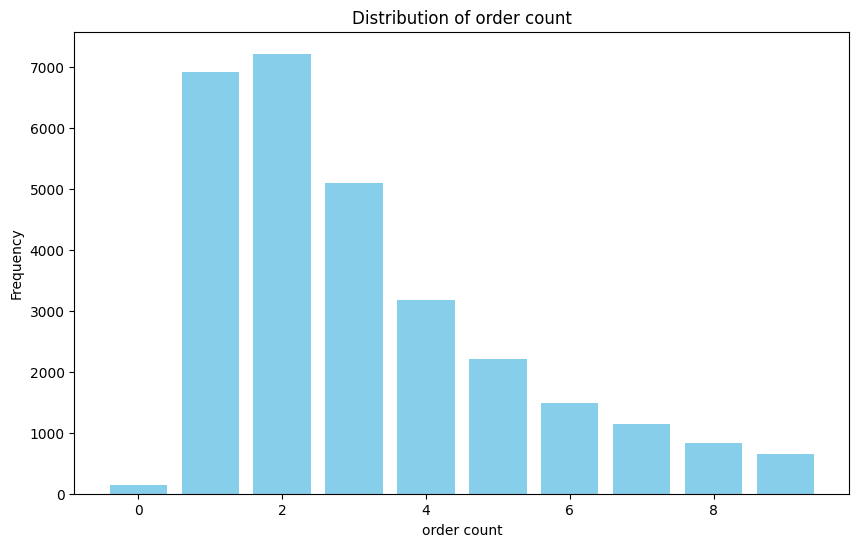

In [106]:
order_counts = df_order_count['order_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(order_counts.index, order_counts.values, color='skyblue')
plt.xlabel('order count')
plt.ylabel('Frequency')
plt.title('Distribution of order count')
plt.xticks(rotation=0)
plt.show()

**Observations**

*   The variable shows a positive skew, with a concentration of lower values and a longer tail extending toward higher values.
*   A significant number of outliers skew toward higher counts. These are not errors but refer to costumers that made a higher number of orders
*   No missing values







## Creation of the variabel intensity_of_activity

intensity_of_activity quantifies how active a customer is by calculating the average number of orders they placed per day

Higher values indicates that a customer is highly engaged, making frequent purchases relative to their time as a customer. This could suggest loyalty or satisfaction with the service

Low values can indicate the risk of churning, as they are not engaging with the service as frequently. This can help in identifying customers who may need re-engagement efforts

In [107]:
df['intensity_of_activity'] = np.where(df['order_count'] == 0, np.nan,  df['costumer_time'] / df['order_count'])

Let's examine the key statistics for this variable:

In [108]:
df['intensity_of_activity'].describe()

,intensity_of_activity
count,31631.000000
mean,8.505465
std,7.888332
min,0.000000
25%,1.500000
50%,7.181818
75%,12.750000
max,44.500000


In [109]:
print('The intensity_of_activity variable has ' + str(df['intensity_of_activity'].isna().mean()*100) + '% of missing values')

The intensity_of_activity variable has 0.7654901960784314% of missing values


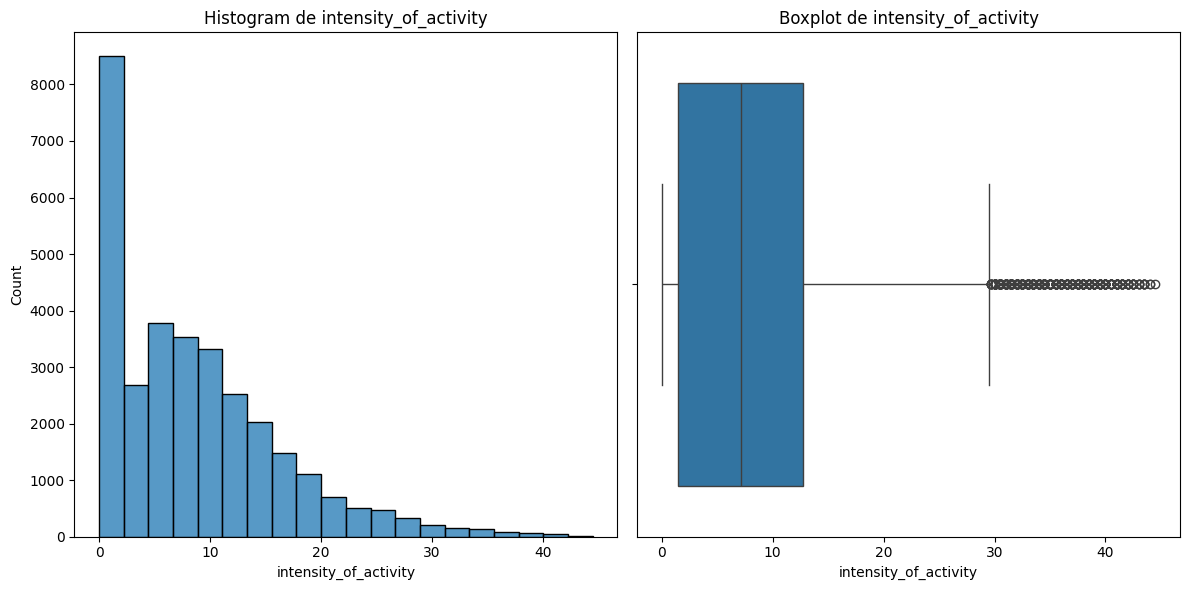

In [110]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['intensity_of_activity'], bins=20, kde=False)
plt.title('Histogram de intensity_of_activity')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['intensity_of_activity'])
plt.title('Boxplot de intensity_of_activity')
plt.tight_layout()
plt.show()

**Observations**


*   The variable shows a positive skew, with a concentration of lower values and a longer tail extending toward higher values.
*   A significant number of outliers skew toward higher counts. These are not errors but refer to costumers that made a higher number of orders in a shorter time
*   There is a big number of zeros due to single buyers
*   The missing values are from rows with order count equal to zero and with missing value in first_order








## Criation of the variable Total_Spended

Total_Spended represents the total amount of money spent by each customer

In [111]:
df['Total_Spended']=df['CUI_Asian']+df['CUI_American']+df['CUI_Beverages']+df['CUI_Cafe']+df['CUI_Chicken Dishes']+df['CUI_Chinese']+df['CUI_Desserts']+df['CUI_Healthy']+df['CUI_Indian']+df['CUI_Italian']+df['CUI_Japanese']+df['CUI_Noodle Dishes']+df['CUI_OTHER']+df['CUI_Street Food / Snacks']

Let's examine the key statistics for this variable:

In [112]:
df['Total_Spended'].describe()

,Total_Spended
count,31875.000000
mean,37.453817
std,45.768390
min,0.000000
25%,12.430000
50%,23.860000
75%,43.975000
max,1308.690000


In [113]:
print('The Total_Spended variable has ' + str(df['Total_Spended'].isna().mean()*100) + '% of missing values')

The Total_Spended variable has 0.0% of missing values


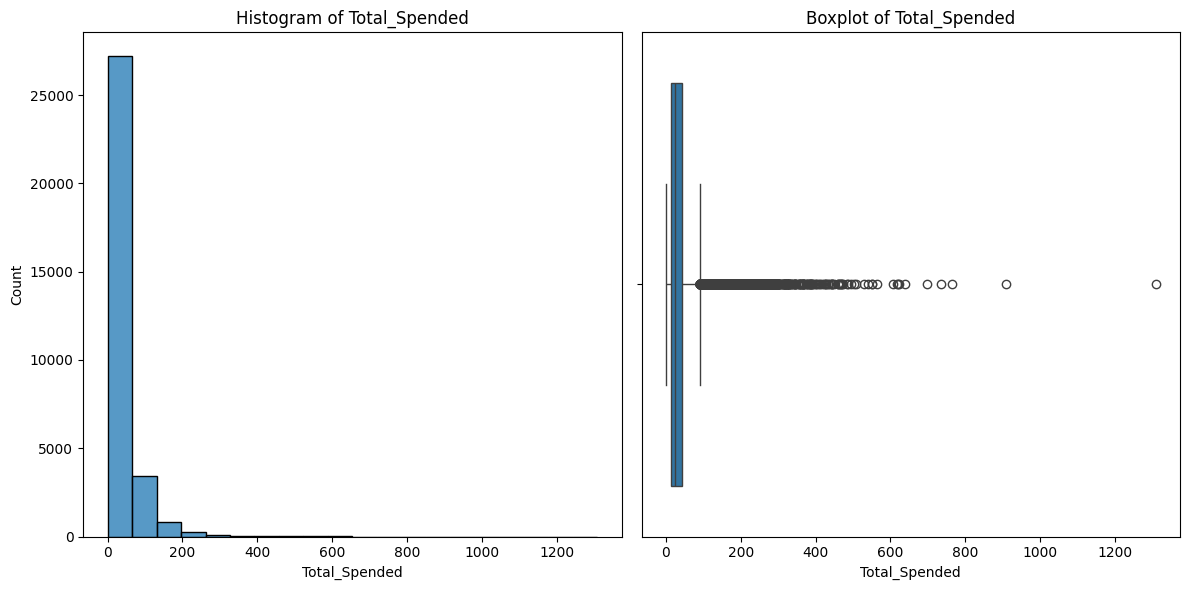

In [114]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Total_Spended'], bins=20, kde=False)
plt.title('Histogram of Total_Spended')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total_Spended'])
plt.title('Boxplot of Total_Spended')
plt.tight_layout()
plt.show()

Examining the histogram and boxplot reveals an asymmetric vendor_count distribution, likely influenced by outliers, as shown in the boxplot. These outliers are unlikely to be data errors; they probably represent clients who simply decided to spend more money in their purchases.

We will obtain this outliers represented in the boxplot using the inter quartis technique

In [115]:
detect_outliers_in_column(df,'Total_Spended')['Total_Spended'].sort_values()

,Total_Spended
customer_id,
47be9396a6,91.30
d6dd517d46,91.32
b787fd1f72,91.37
24a90256b9,91.37
d385902935,91.38
...,...
9b7035b6a3,698.48
f4b9bc0d01,736.15
8d65421423,763.92


In [116]:
df_Total_Spended=df.copy()
df_Total_Spended=df_Total_Spended[df_Total_Spended['Total_Spended']<91.30]

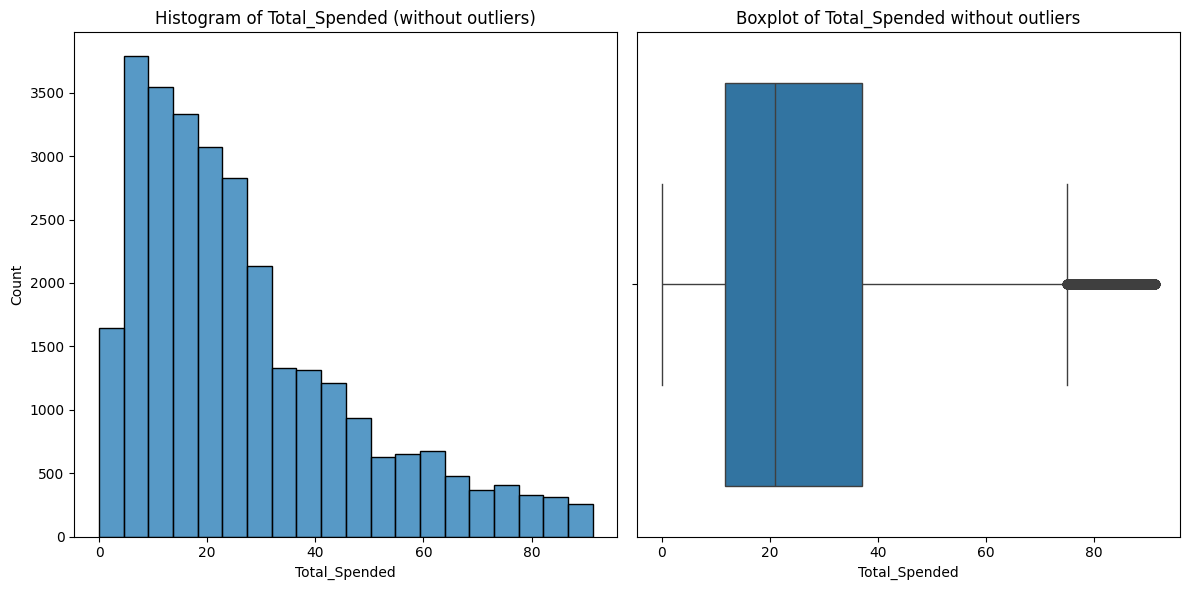

In [117]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_Total_Spended['Total_Spended'], bins=20, kde=False)
plt.title('Histogram of Total_Spended (without outliers)')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_Total_Spended['Total_Spended'])
plt.title('Boxplot of Total_Spended without outliers')
plt.tight_layout()
plt.show()

**Observations**


*   The variable shows a positive skew, with a concentration of lower values and a longer tail extending toward higher values.
*   A significant number of extreme outliers, these are not errors but refer to costumers that spent an extreme amout of money
*   No missing values

## Creation of the variable Customer_loyalty

Customer_loyalty represents how diverse a customer’s ordering behavior is.

A high value may indicate a willingness to try new vendors.

A low value may suggest a strong preference or loyalty for one or more vendors

In [118]:
df['Customer_loyalty'] = df['vendor_count'] / df['order_count']

Let's examine the key statistics for this variable:

In [119]:
df['Customer_loyalty'].describe()

,Customer_loyalty
count,31737.000000
mean,0.838196
std,0.229567
min,0.026667
25%,0.666667
50%,1.000000
75%,1.000000
max,1.000000


In [120]:
print('The Customer_loyalty variable has ' + str(df['Customer_loyalty'].isna().mean()*100) + '% of missing values')

The Customer_loyalty variable has 0.4329411764705882% of missing values


In [121]:
df[df['Customer_loyalty']==df['Customer_loyalty'].min()]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_23,inc_5,costumer_time,order_hour_spread,order_day_spread,diversity_cuisine,order_count,intensity_of_activity,Total_Spended,Customer_loyalty
customer_id,,,,,,,,,,,,,,,,,,,,,
e1491fb8f7,2360,17.0,2,75,75,2.0,89,FREEBIE,CARD,0.0,...,0,False,87.0,1.949769,1.986353,2.0,75,1.16,173.16,0.026667


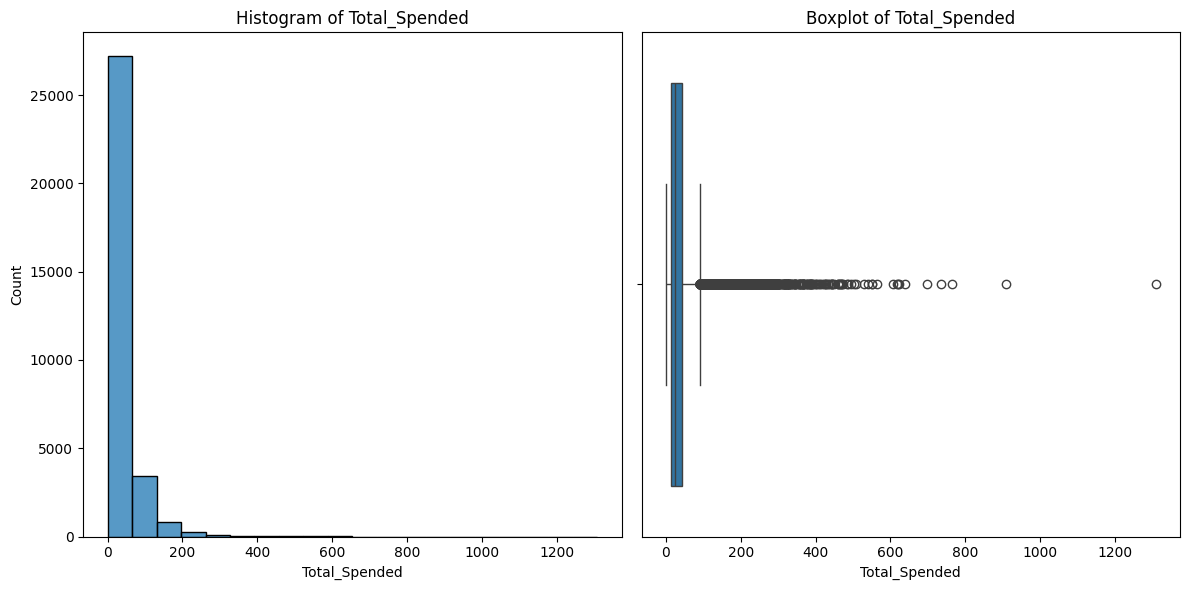

In [122]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Total_Spended'], bins=20, kde=False)
plt.title('Histogram of Total_Spended')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total_Spended'])
plt.title('Boxplot of Total_Spended')
plt.tight_layout()
plt.show()

## Creation of the variable age_category

age_category categorizes individuals into distinct age groups

In [123]:
bins = [15, 20, 30, 50,100]
labels = ['Teen', 'Young-Adult', 'Adult', 'Senior']
df['age_category'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=True)

Let's examine the key statistics for this variable:

In [124]:
df['age_category'].describe()

,age_category
count,31128
unique,4
top,Young-Adult
freq,19636


In [125]:
print('The age_category variable has ' + str(df['age_category'].isna().mean()*100) + '% of missing values')

The age_category variable has 2.3435294117647056% of missing values


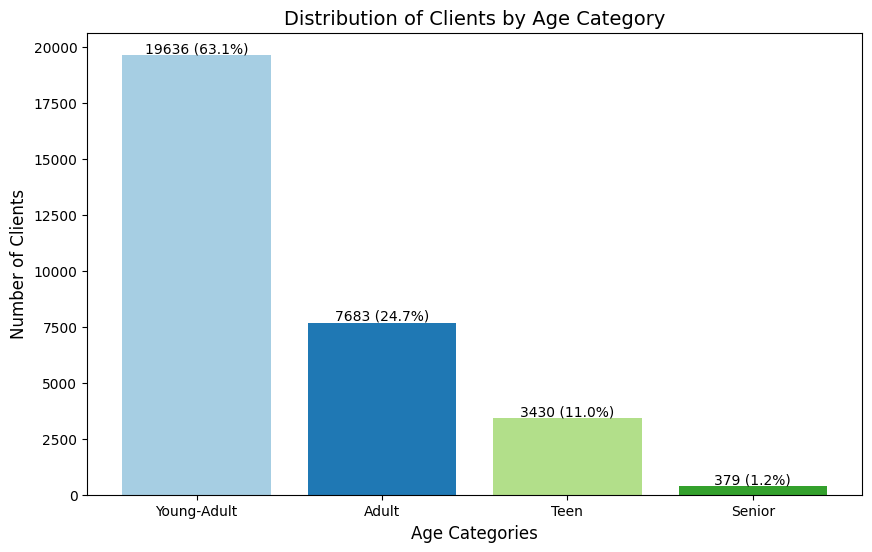

In [126]:
region_counts = df['age_category'].value_counts(dropna=True)
colors = plt.cm.Paired(range(len(region_counts)))

plt.figure(figsize=(10, 6))
plt.bar(region_counts.index, region_counts.values, color=colors)

plt.xlabel('Age Categories', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Distribution of Clients by Age Category', fontsize=14)

for i, count in enumerate(region_counts.values):
    plt.text(i, count + 100, f'{count} ({100 * count / sum(region_counts):.1f}%)', ha='center')

plt.show()


# Relations between variables

## Relation between Total_Spended and payment_method

In theory, customers are more likely to pay by card for larger purchases due to convenience. To test this in our data, we will group customers into sets of 100 based on ascending order of money spent and then analyze the proportion of cash versus card payments within each group

<ipython-input-135-611a2c7d6c2b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cash_proportion = df.groupby('group').apply(
<ipython-input-135-611a2c7d6c2b>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  card_proportion = df.groupby('group').apply(
<ipython-input-135-611a2c7d6c2b>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a futu

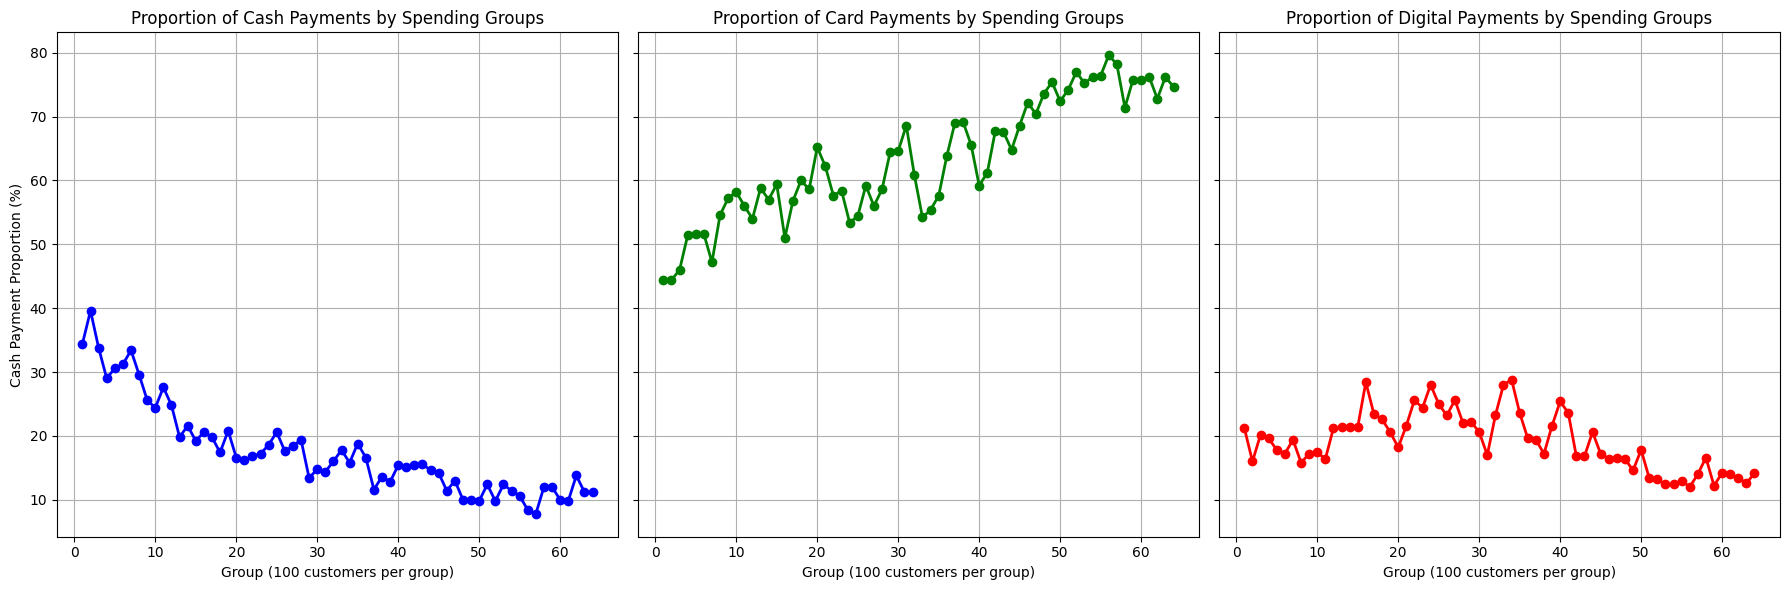

In [135]:
df = df.sort_values(by='Total_Spended').reset_index(drop=True)

df['group'] = (df.index // 500) + 1
cash_proportion = df.groupby('group').apply(
    lambda x: (x['payment_method'].str.lower() == 'cash').mean() * 100
).reset_index(name='cash_proportion')

card_proportion = df.groupby('group').apply(
    lambda x: ((x['payment_method'].str.lower() == 'card') | (x['payment_method'].str.lower() == 'debit')).mean() * 100
).reset_index(name='card_proportion')

digital_proportion = df.groupby('group').apply(
    lambda x: ((x['payment_method'].str.lower() == 'digi') | (x['payment_method'].str.lower() == 'debit')).mean() * 100
).reset_index(name='DIGI_proportion')
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
axes[0].plot(cash_proportion['group'], cash_proportion['cash_proportion'], marker='o', color='blue', linestyle='-', linewidth=2)
axes[0].set_title('Proportion of Cash Payments by Spending Groups')
axes[0].set_xlabel('Group (100 customers per group)')
axes[0].set_ylabel('Cash Payment Proportion (%)')
axes[0].grid(True)


axes[1].plot(card_proportion['group'], card_proportion['card_proportion'], marker='o', color='green', linestyle='-', linewidth=2)
axes[1].set_title('Proportion of Card Payments by Spending Groups')
axes[1].set_xlabel('Group (100 customers per group)')
axes[1].grid(True)

axes[2].plot(digital_proportion['group'], digital_proportion['DIGI_proportion'], marker='o', color='red', linestyle='-', linewidth=2)
axes[2].set_title('Proportion of Digital Payments by Spending Groups')
axes[2].set_xlabel('Group (100 customers per group)')
axes[2].grid(True)

plt.tight_layout()
plt.show()

## Relation between is_chain and CUIs

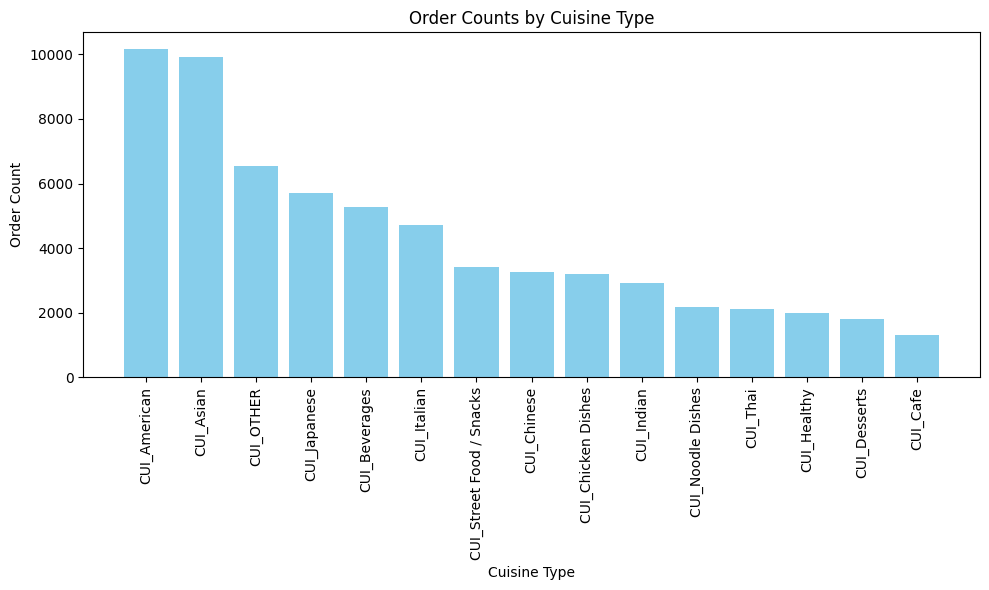

In [136]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
chain_orders = df[df['is_chain'] > 0]
cuisine_chain_counts = {}
for cuisine in cuisine_columns:
    cuisine_chain_counts[cuisine] = (chain_orders[cuisine] > 0).sum()
cuisine_chain_df = pd.DataFrame(list(cuisine_chain_counts.items()), columns=['Cuisine_Type', 'Chain_Order_Count'])
cuisine_chain_df.sort_values(by='Chain_Order_Count', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(cuisine_chain_df['Cuisine_Type'], cuisine_chain_df['Chain_Order_Count'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
plt.title('Order Counts by Cuisine Type')
plt.tight_layout()
plt.show()

## Relation between age and total_spended

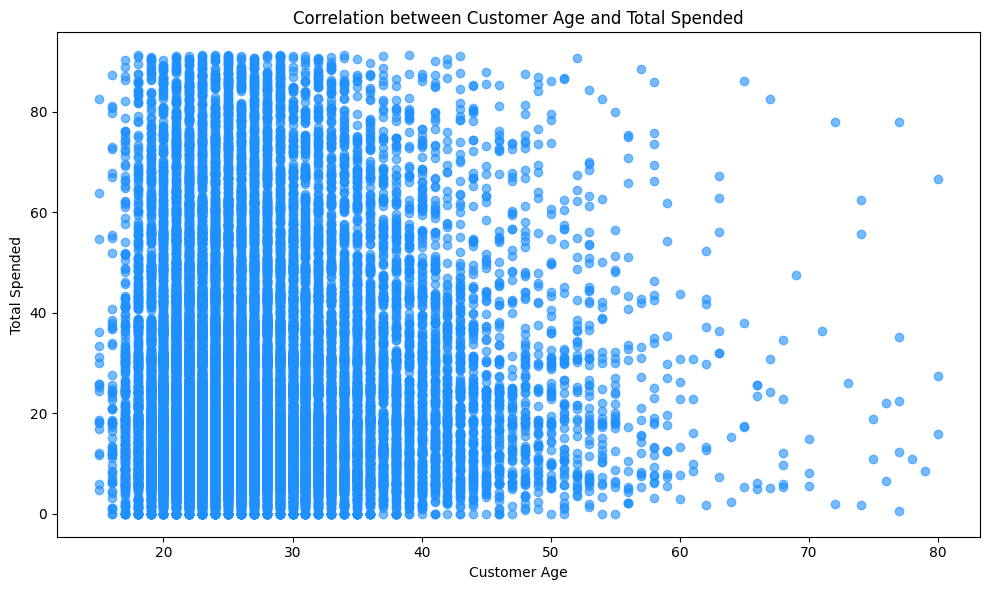

In [137]:
plt.figure(figsize=(10, 6))
plt.scatter(df_Total_Spended['customer_age'], df_Total_Spended['Total_Spended'], color='dodgerblue', alpha=0.6)
plt.xlabel('Customer Age')
plt.ylabel('Total Spended')
plt.title('Correlation between Customer Age and Total Spended')
plt.tight_layout()
plt.show()

## Relation between customer_age and payment_method

We are going to see if there are diferent proportions between ages and the type of payment

In [138]:
#Dividing ages by classes of 10 years
df['customer_age_class'] = pd.cut(df['customer_age'], bins = range(0, 90, 10))
df['customer_age_class']

,customer_age_class
0,"(30, 40]"
1,"(20, 30]"
2,"(20, 30]"
3,"(10, 20]"
4,"(10, 20]"
...,...
31870,"(10, 20]"
31871,"(20, 30]"
31872,"(20, 30]"
31873,"(30, 40]"


<ipython-input-139-238e473a7784>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_payment = df.groupby(['customer_age_class', 'payment_method']).size().unstack(fill_value = 0)


Text(0.5, 1.0, 'Proportion of Payment Methods by Age Class')

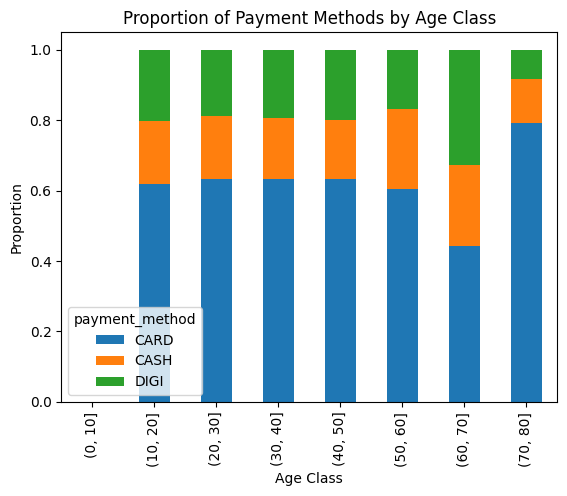

In [139]:
age_payment = df.groupby(['customer_age_class', 'payment_method']).size().unstack(fill_value = 0)
age_proportions = age_payment.div(age_payment.sum(axis = 1), axis = 0)

#Plot
age_proportions.plot(kind = 'bar', stacked = True)
plt.xlabel('Age Class')
plt.ylabel('Proportion')
plt.title('Proportion of Payment Methods by Age Class')

**Observations:**\
- It doesn't appear that the age affects the payment_method

## Relation between customer_age and CUI_types

<ipython-input-140-f54fdda8bcc8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cui_columns] = data[cui_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
<ipython-input-140-f54fdda8bcc8>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cuisine_data = data.groupby('customer_age_class')[cui_columns].sum()


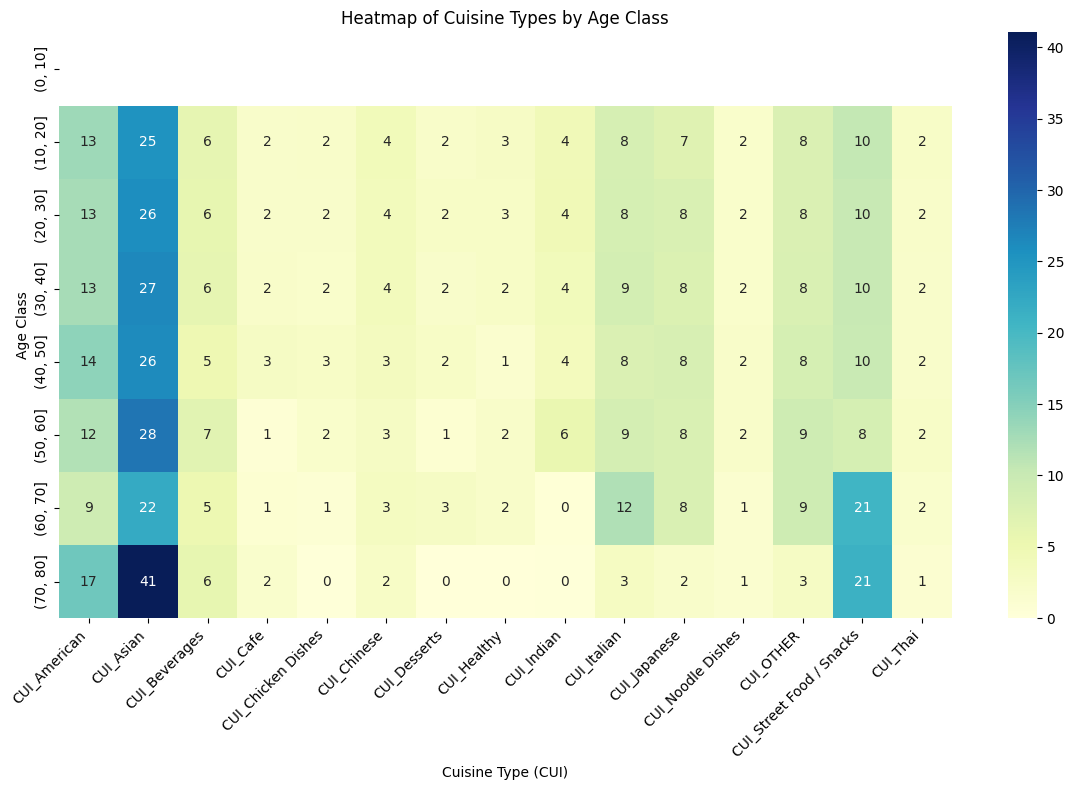

In [140]:
data = df.dropna(subset=['customer_age'])

# Filter columns that start with 'CUI_' for cuisine types
cui_columns = [col for col in data.columns if col.startswith('CUI_')]
data[cui_columns] = data[cui_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Group data by age class and sum cuisine types
age_cuisine_data = data.groupby('customer_age_class')[cui_columns].sum()

age_cuisine_data['Total Spent'] = age_cuisine_data.sum(axis=1)
age_cuisine_percentages = age_cuisine_data.div(age_cuisine_data['Total Spent'], axis=0) * 100
age_cuisine_percentages.drop(columns=['Total Spent'], inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(age_cuisine_percentages, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Heatmap of Cuisine Types by Age Class')
plt.xlabel('Cuisine Type (CUI)')
plt.ylabel('Age Class')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Observations:**\
-It appears that every age gap buys more from Asian Cuisine, and secondly American Cuisine\
-The ages between 60 and 80 also have an high proportion that buy Streed Food/Snacks\
-Ages between 60 and 70 third favorite Cuisine is Italian, unlike other age gaps that is the Street Food/Snacks

## Relation between customer_age and HR_

<ipython-input-141-8cae94168bee>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_hr_data = data.groupby('customer_age_class')[hr_columns].sum()


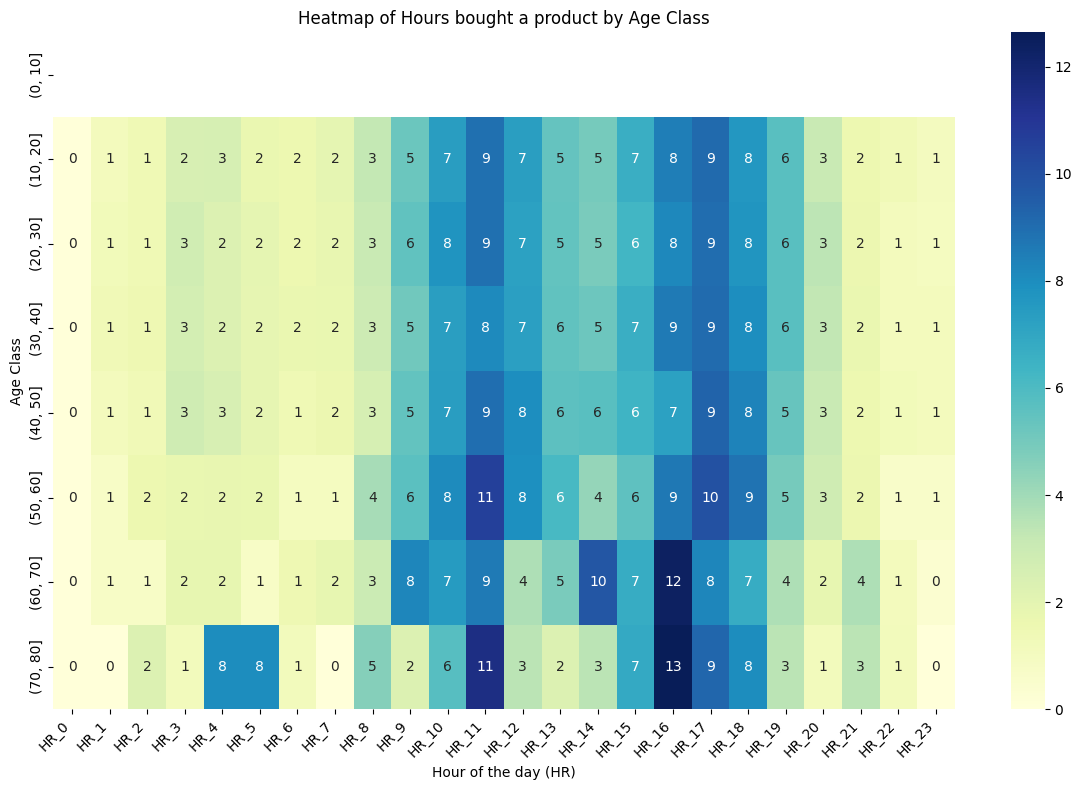

In [141]:
#Filter the columns that start with 'HR_'
hr_columns = [col for col in df.columns if col.startswith('HR_')]
df[hr_columns] = df[hr_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Group data by age class and sum cuisine types
age_hr_data = data.groupby('customer_age_class')[hr_columns].sum()
age_hr_data['Total Spent'] = age_hr_data.sum(axis=1)

age_hr_percentage = age_hr_data.div(age_hr_data['Total Spent'], axis=0) * 100
age_hr_percentage.drop(columns=['Total Spent'], inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(age_hr_percentage, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Heatmap of Hours bought a product by Age Class')
plt.xlabel('Hour of the day (HR)')
plt.ylabel('Age Class')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Observations:**
- The most common hours that every age gap buys is between HR_10 and HR_19, that is the fact that customers buy a bit before the time of meals.

## Relation between customer_age and vendor_count

<ipython-input-142-600f7919954f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vendor = df.groupby(['customer_age_class', 'vendor_count']).size().unstack(fill_value = 0)


Text(0.5, 1.0, 'Proportion of Vendor Count by Age Class')

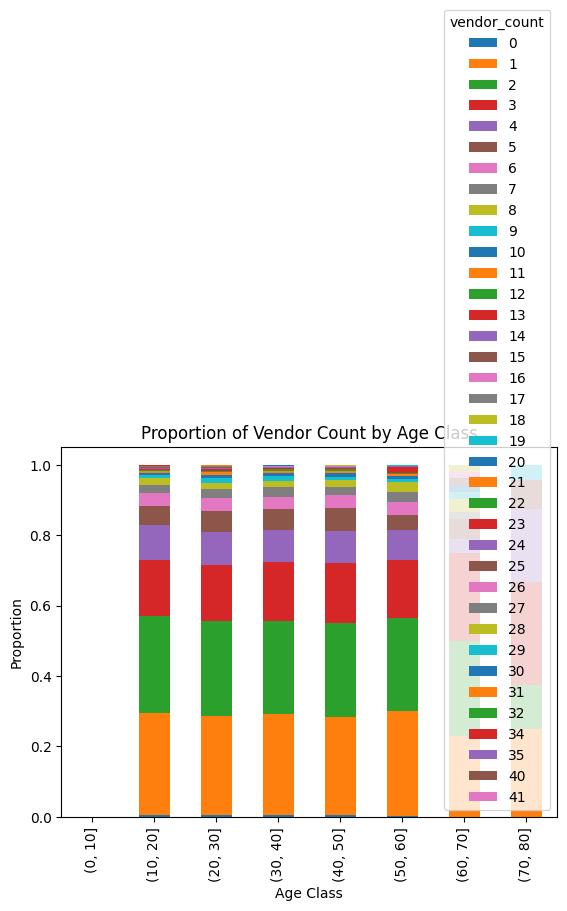

In [142]:
age_vendor = df.groupby(['customer_age_class', 'vendor_count']).size().unstack(fill_value = 0)
vendor_proportions = age_vendor.div(age_vendor.sum(axis = 1), axis = 0)

#Plot
vendor_proportions.plot(kind = 'bar', stacked = True)
plt.xlabel('Age Class')
plt.ylabel('Proportion')
plt.title('Proportion of Vendor Count by Age Class')

<Axes: xlabel='vendor_count'>

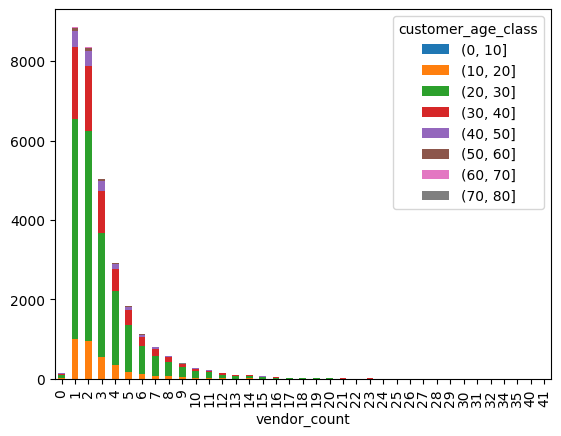

In [143]:
df['customer_age_class'].groupby(df['vendor_count']).value_counts().unstack().plot(kind='bar', stacked=True)

## Relation between Cuisine and Region

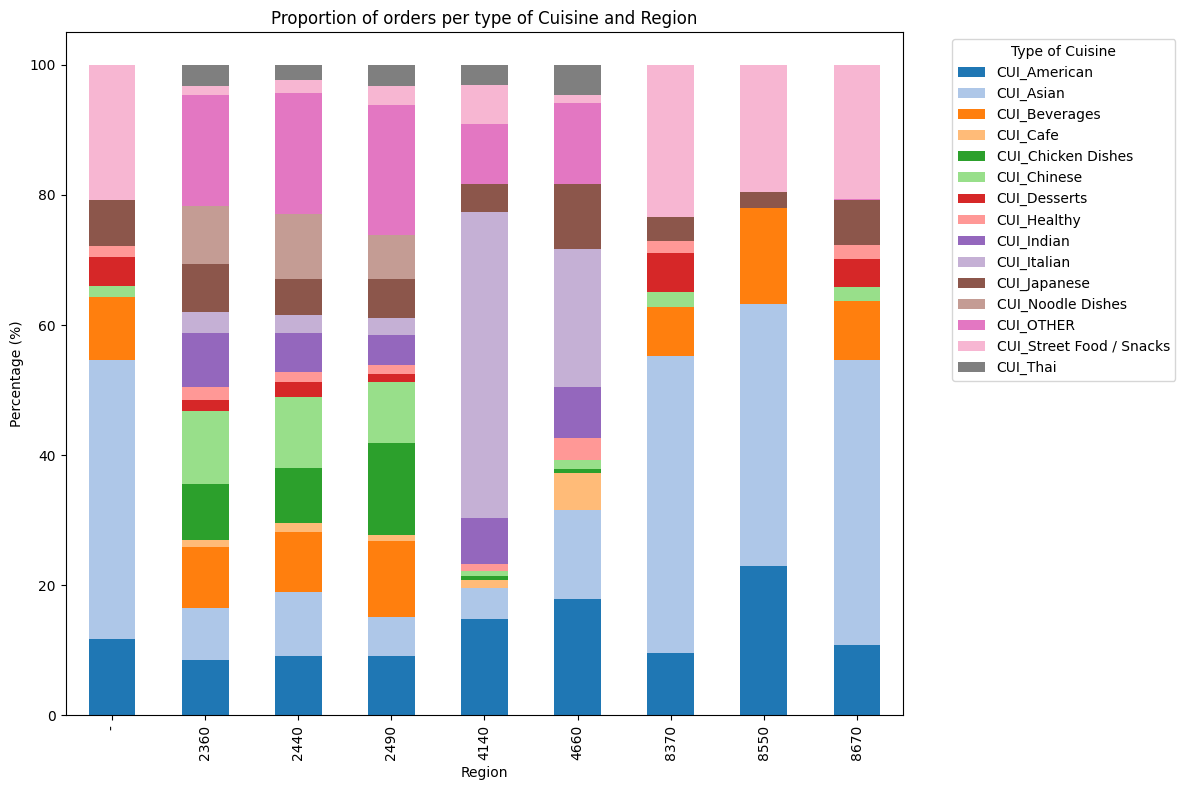

In [144]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
region_cuisine_data = df[['customer_region'] + cuisine_columns]


region_cuisine_summary = region_cuisine_data.groupby('customer_region').sum()


region_cuisine_percentage = region_cuisine_summary.div(region_cuisine_summary.sum(axis=1), axis=0) * 100

colors = plt.get_cmap("tab20").colors
region_cuisine_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

plt.title("Proportion of orders per type of Cuisine and Region")
plt.xlabel("Region")
plt.ylabel("Percentage (%)")
plt.legend(title="Type of Cuisine", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## relation

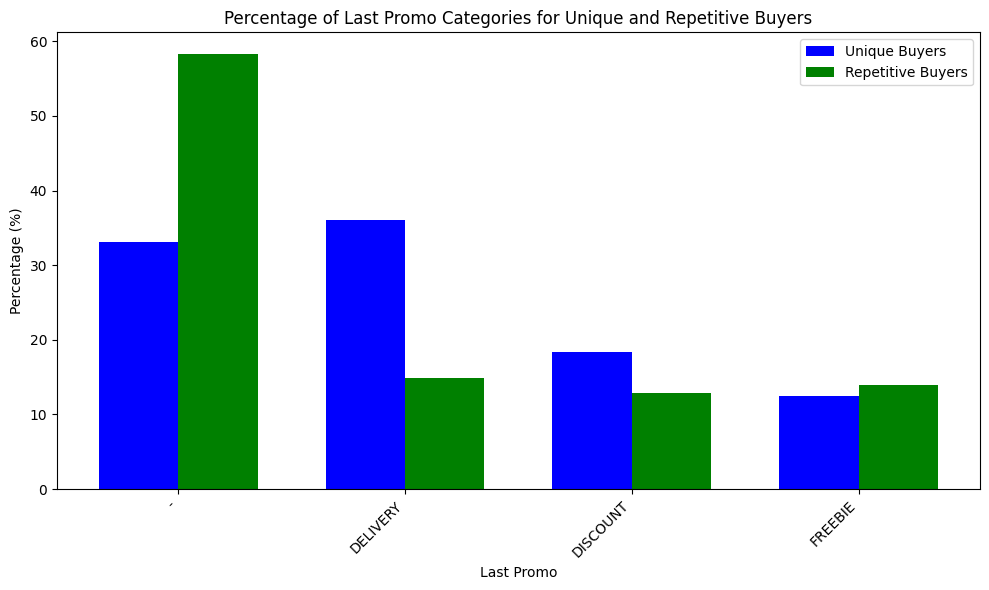

In [149]:
import matplotlib.pyplot as plt

# Filtrar compradores únicos e repetitivos
unique_buyer = df[df['costumer_time'] == 0]
repetitive_buyer = df[df['costumer_time'] > 0]

# Calcular as proporções (percentagens) de cada categoria 'last_promo' em cada grupo
unique_percentages = (unique_buyer['last_promo'].value_counts(normalize=True) * 100).sort_index()
repetitive_percentages = (repetitive_buyer['last_promo'].value_counts(normalize=True) * 100).sort_index()

# Alinhar os índices para garantir que todas as categorias estejam representadas em ambos os grupos
all_categories = unique_percentages.index.union(repetitive_percentages.index)
unique_percentages = unique_percentages.reindex(all_categories, fill_value=0)
repetitive_percentages = repetitive_percentages.reindex(all_categories, fill_value=0)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar a largura das barras e as posições para o gráfico de barras agrupadas
bar_width = 0.35
bar_positions = range(len(all_categories))

# Plotar as barras para compradores únicos e repetitivos
ax.bar([pos - bar_width/2 for pos in bar_positions], unique_percentages, width=bar_width, label='Unique Buyers', color='blue')
ax.bar([pos + bar_width/2 for pos in bar_positions], repetitive_percentages, width=bar_width, label='Repetitive Buyers', color='green')

# Configurar os rótulos e título do gráfico
ax.set_xticks(bar_positions)
ax.set_xticklabels(all_categories, rotation=45, ha='right')
ax.set_xlabel('Last Promo')
ax.set_ylabel('Percentage (%)')
ax.set_title('Percentage of Last Promo Categories for Unique and Repetitive Buyers')
ax.legend()

plt.tight_layout()
plt.show()